In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("../Dataset/Refined_Dataset.csv", index_col=False)
df.head()

,Machine,Component,Parameter,Value,Probability of Failure,Status
0,Excavator_1,Engine,Temparature,104.0,0.100,Low Risk
1,Articulated_Truck_1,Fuel,Water in Fuel,70.0,0.100,Low Risk
2,Articulated_Truck_1,Engine,Temparature,104.0,0.100,Low Risk
3,Backhoe_Loader_1,Drive,Transmission Pressure,231.0,0.155,Low Risk
4,Excavator_1,Engine,Oil Pressure,39.0,0.100,Low Risk


In [3]:
df['Parameter'].unique()

array(['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure'], dtype=object)

In [4]:
categories = df['Parameter'].unique()

In [5]:
categories

array(['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure'], dtype=object)

In [6]:
filtered_df_dict = {category: df[df['Parameter'] == category][['Value', 'Machine', 'Component','Status']] for category in categories}

In [7]:
filtered_df_dict

{'Temparature':      Value              Machine Component    Status
 0    104.0          Excavator_1    Engine  Low Risk
 2    104.0  Articulated_Truck_1    Engine  Low Risk
 5    215.0              Dozer_1      Fuel  Low Risk
 6    202.0     Backhoe_Loader_1      Fuel  Low Risk
 39     0.0  Articulated_Truck_1      Fuel  Low Risk
 ..     ...                  ...       ...       ...
 956  398.0      Asphalt_Paver_1      Fuel  Low Risk
 981  291.0      Asphalt_Paver_1      Fuel  Low Risk
 988  394.0      Asphalt_Paver_1      Fuel  Low Risk
 990  383.0      Asphalt_Paver_1      Fuel  Low Risk
 992   81.0      Asphalt_Paver_1    Engine  Low Risk
 
 [125 rows x 4 columns],
 'Water in Fuel':       Value              Machine Component    Status
 1      70.0  Articulated_Truck_1      Fuel  Low Risk
 17   1315.0              Dozer_1      Fuel  Low Risk
 51    413.0          Excavator_1      Fuel  Low Risk
 52   1300.0     Backhoe_Loader_1      Fuel  Low Risk
 56   1047.0          Excavator_1  

In [8]:
os.makedirs("../graphs", exist_ok=True)

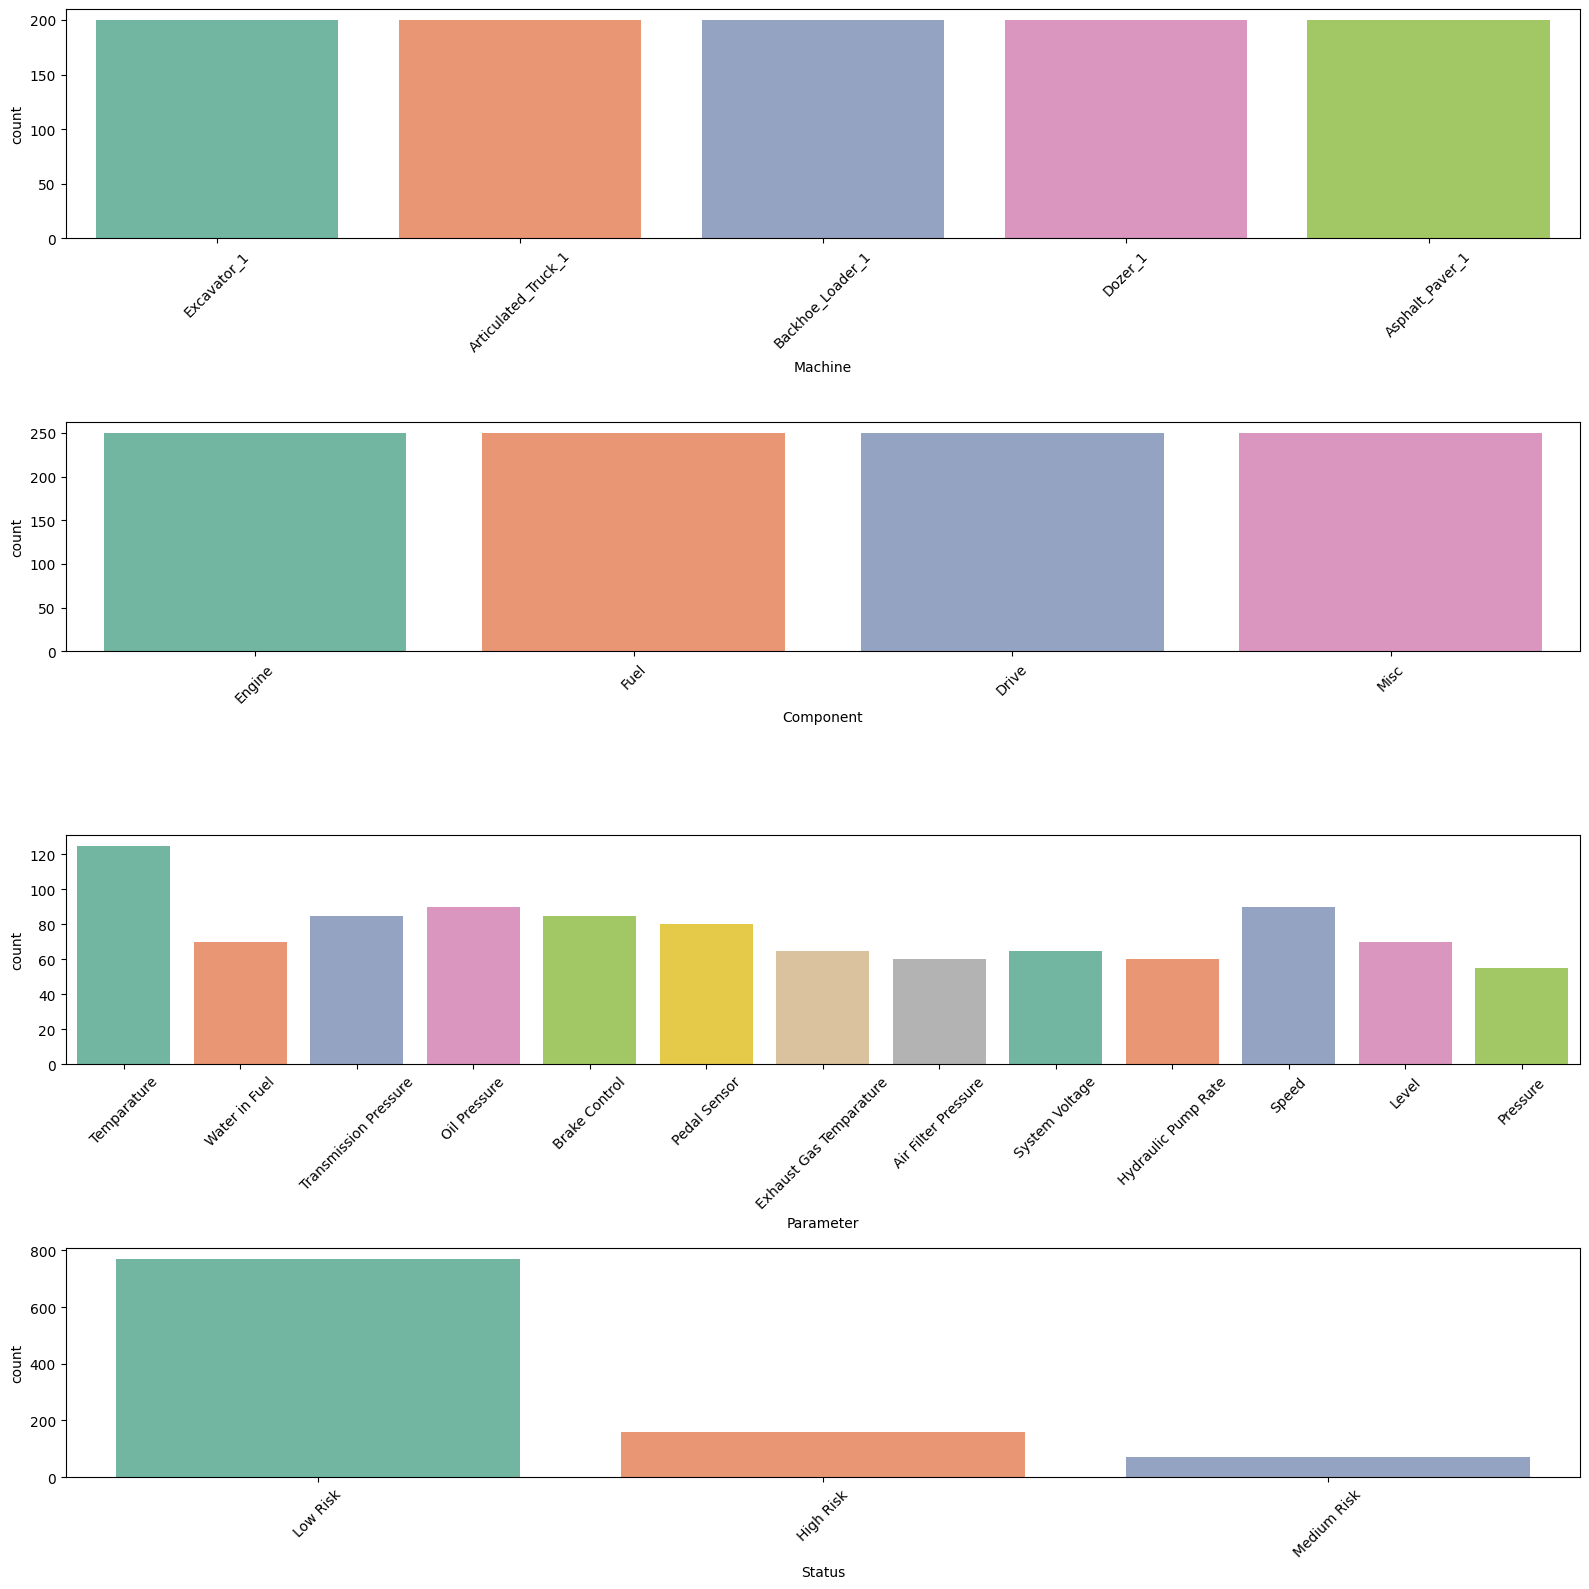

In [10]:
categorical_features = ['Machine', 'Component', 'Parameter','Status']
plt.figure(figsize=(16, 16))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(x=df[feature], palette="Set2")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot to the local directory "graphs"
    plt.savefig(f"../graphs/plot_{feature}.png")

plt.show()

In [11]:
# Create separate DataFrames for each parameter
temperature_df = filtered_df_dict.get('Temparature', pd.DataFrame())
water_in_fuel_df = filtered_df_dict.get('Water in Fuel', pd.DataFrame())
transmission_pressure_df = filtered_df_dict.get('Transmission Pressure', pd.DataFrame())
oil_pressure_df = filtered_df_dict.get('Oil Pressure', pd.DataFrame())
brake_control_df = filtered_df_dict.get('Brake Control', pd.DataFrame())
pedal_sensor_df = filtered_df_dict.get('Pedal Sensor', pd.DataFrame())
exhaust_temperature_df = filtered_df_dict.get('Exhaust Gas Temparature', pd.DataFrame())
air_filter_pressure_df = filtered_df_dict.get('Air Filter Pressure', pd.DataFrame())
system_voltage_df = filtered_df_dict.get('System Voltage', pd.DataFrame())
hydraulic_pump_rate_df = filtered_df_dict.get('Hydraulic Pump Rate', pd.DataFrame())
engine_speed_df = filtered_df_dict.get('Speed', pd.DataFrame())
level_df = filtered_df_dict.get('Level', pd.DataFrame())
pressure_df = filtered_df_dict.get('Pressure', pd.DataFrame())

In [12]:
water_in_fuel_df

,Value,Machine,Component,Status
1,70.0,Articulated_Truck_1,Fuel,Low Risk
17,1315.0,Dozer_1,Fuel,Low Risk
51,413.0,Excavator_1,Fuel,Low Risk
52,1300.0,Backhoe_Loader_1,Fuel,Low Risk
56,1047.0,Excavator_1,Fuel,Low Risk
...,...,...,...,...
892,622.0,Asphalt_Paver_1,Fuel,Low Risk
924,539.0,Asphalt_Paver_1,Fuel,Low Risk
931,1161.0,Asphalt_Paver_1,Fuel,Low Risk
945,1444.0,Asphalt_Paver_1,Fuel,Low Risk


In [13]:
transmission_pressure_df

,Value,Machine,Component,Status
3,231.0,Backhoe_Loader_1,Drive,Low Risk
22,263.0,Excavator_1,Drive,Medium Risk
28,262.0,Backhoe_Loader_1,Drive,Medium Risk
35,403.0,Excavator_1,Drive,Low Risk
37,203.0,Excavator_1,Drive,Low Risk
...,...,...,...,...
976,281.0,Asphalt_Paver_1,Drive,Medium Risk
977,232.0,Asphalt_Paver_1,Drive,Low Risk
979,306.0,Asphalt_Paver_1,Drive,Medium Risk
984,303.0,Asphalt_Paver_1,Drive,Medium Risk


--- Analyzing Temperature ---
            Value
count  125.000000
mean   160.256000
std    121.003326
min      0.000000
25%     85.000000
50%     95.000000
75%    279.000000
max    398.000000
Risk Status Counts:
Status
Low Risk    125
Name: count, dtype: int64



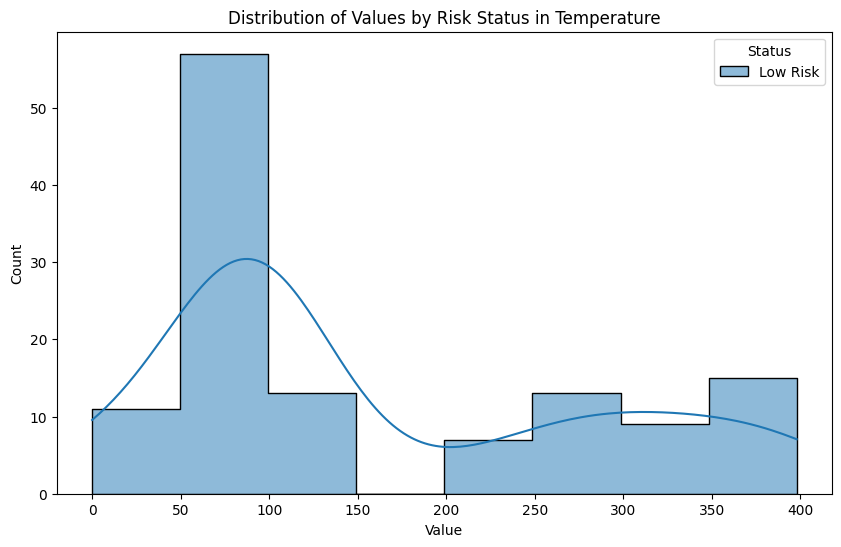

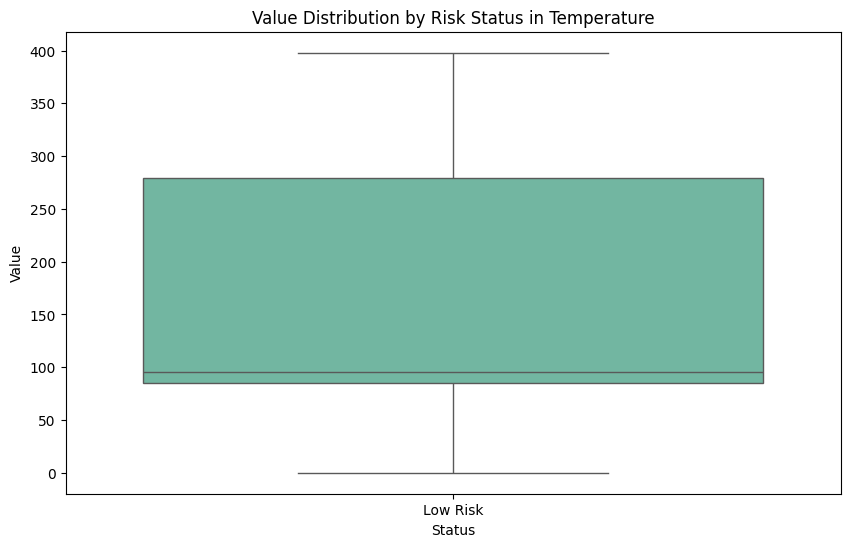

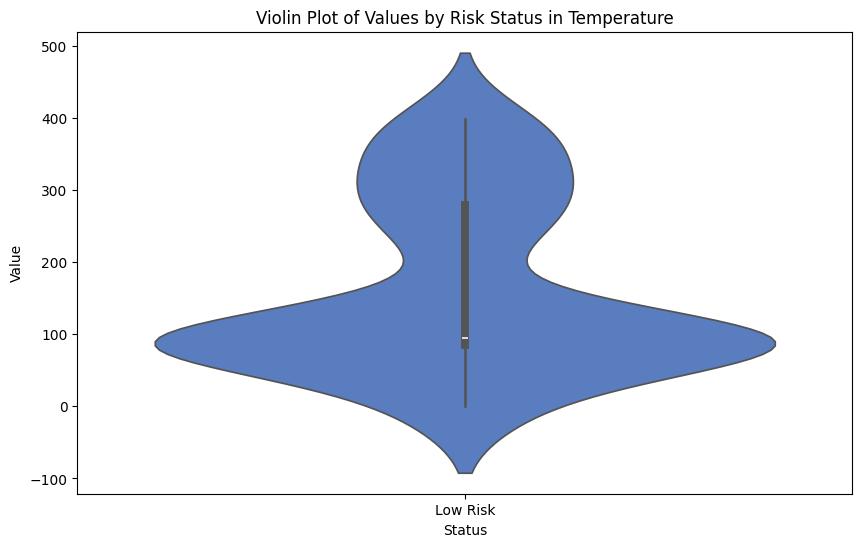

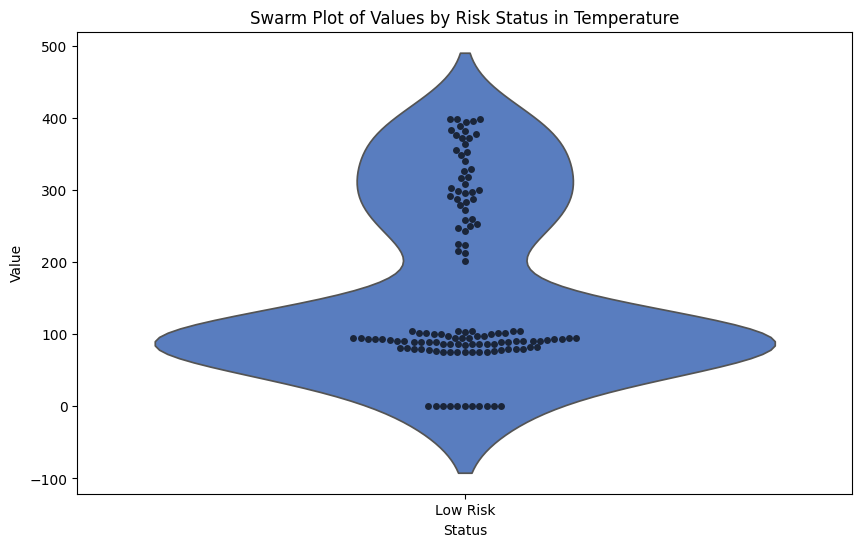

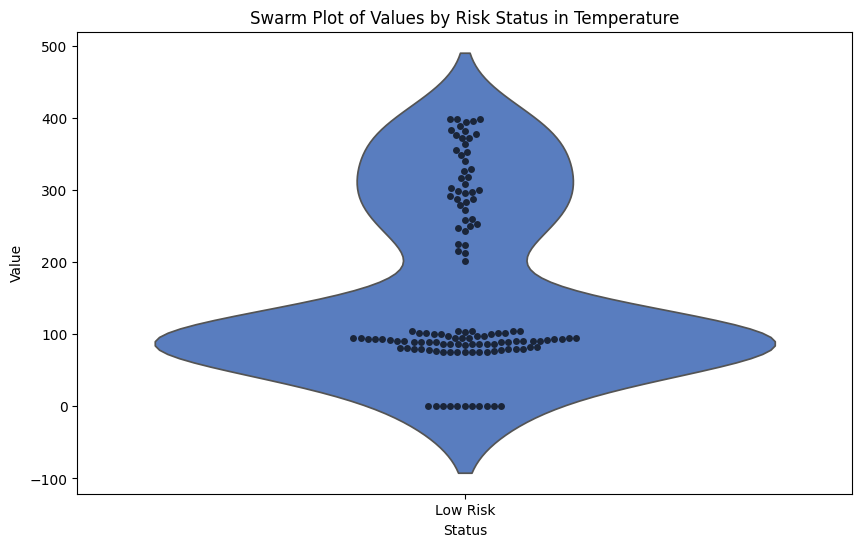

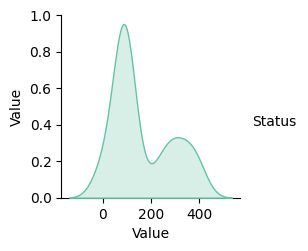

--- Analyzing Water in Fuel ---
             Value
count    70.000000
mean    747.842857
std     558.458090
min      50.000000
25%     277.750000
50%     517.000000
75%    1311.250000
max    1785.000000
Risk Status Counts:
Status
Low Risk    70
Name: count, dtype: int64



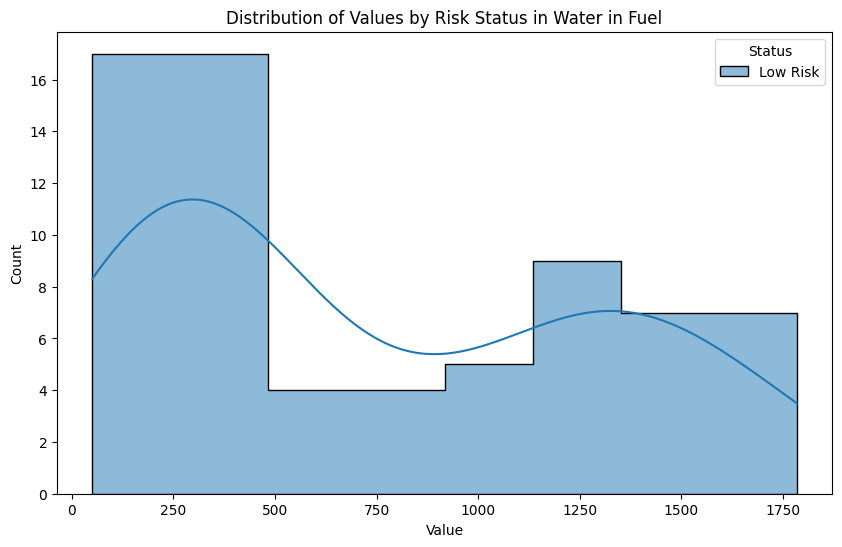

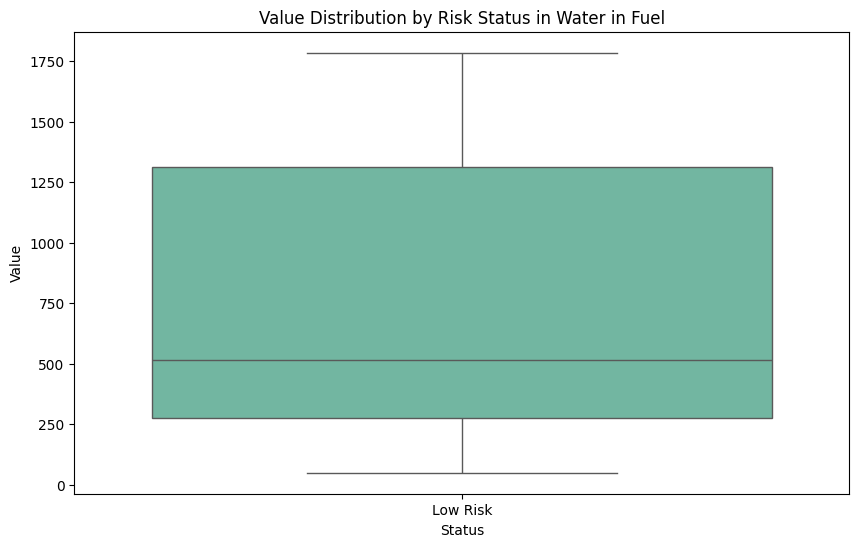

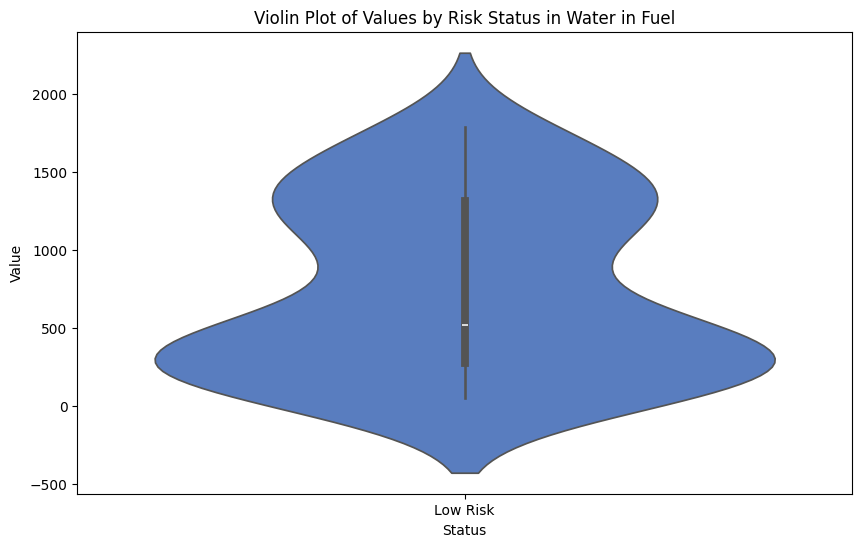

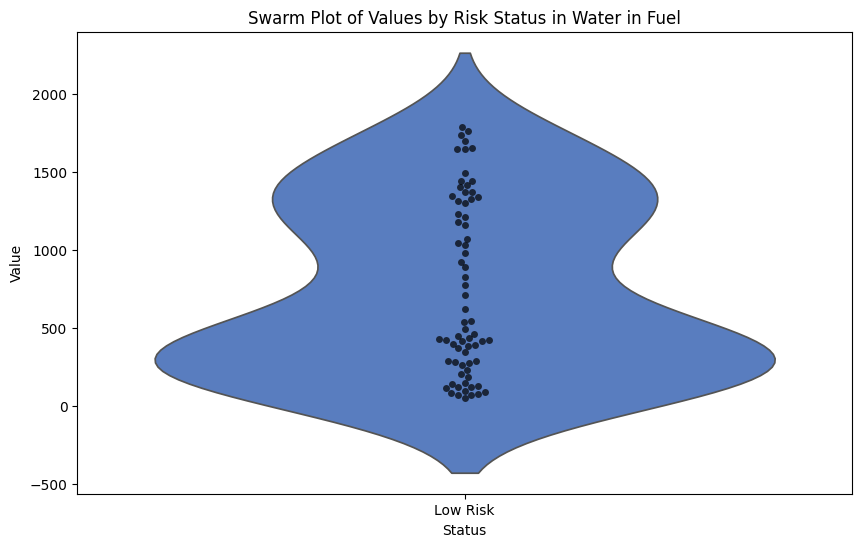

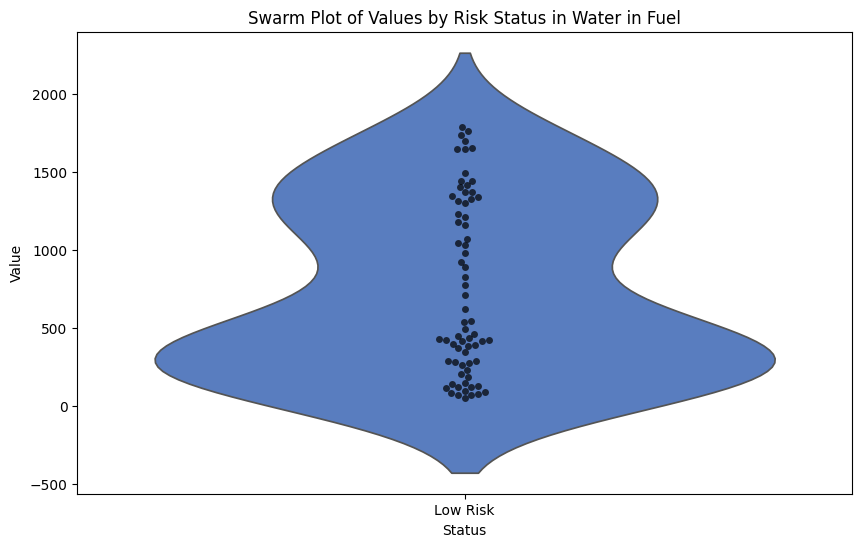

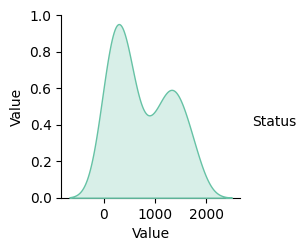

--- Analyzing Transmission Pressure ---
            Value
count   85.000000
mean   326.258824
std     71.728017
min    203.000000
25%    267.000000
50%    323.000000
75%    384.000000
max    450.000000
Risk Status Counts:
Status
Low Risk       62
Medium Risk    23
Name: count, dtype: int64



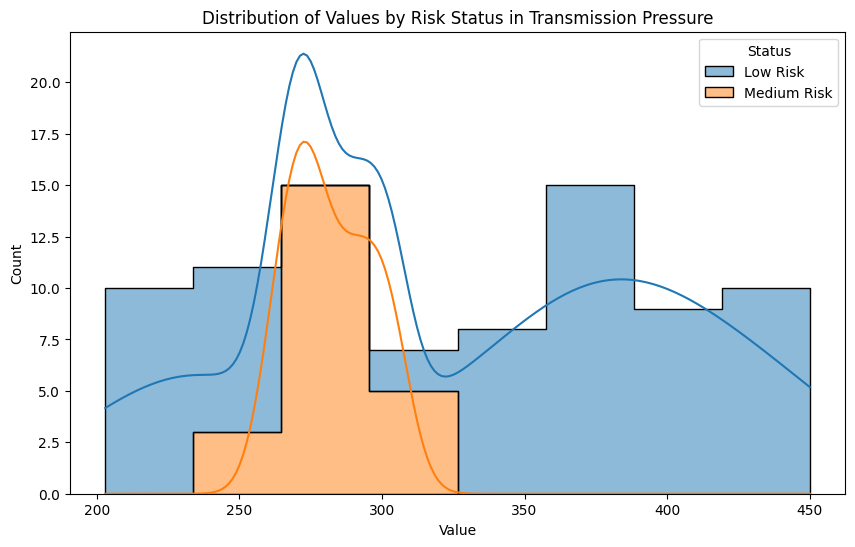

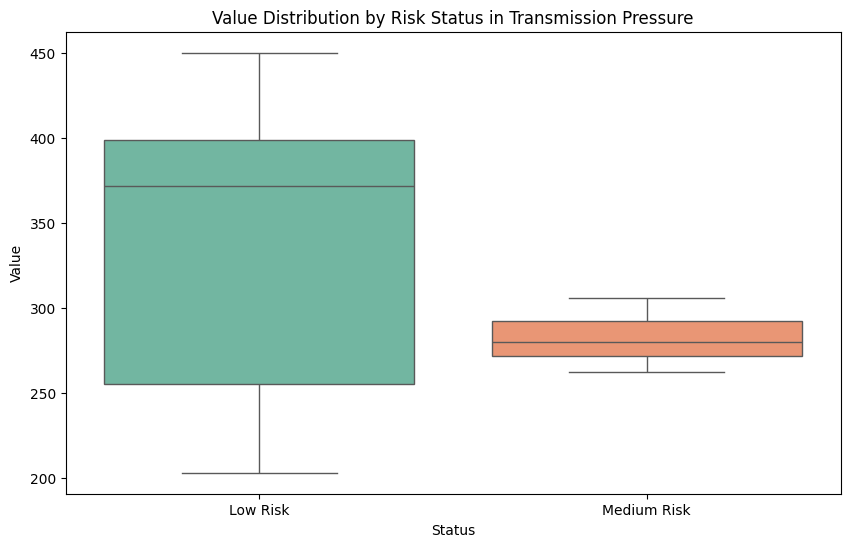

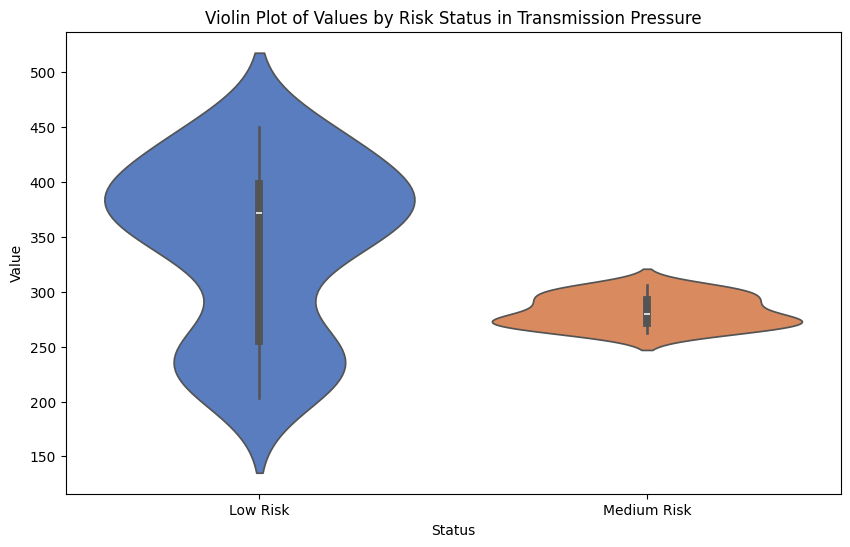

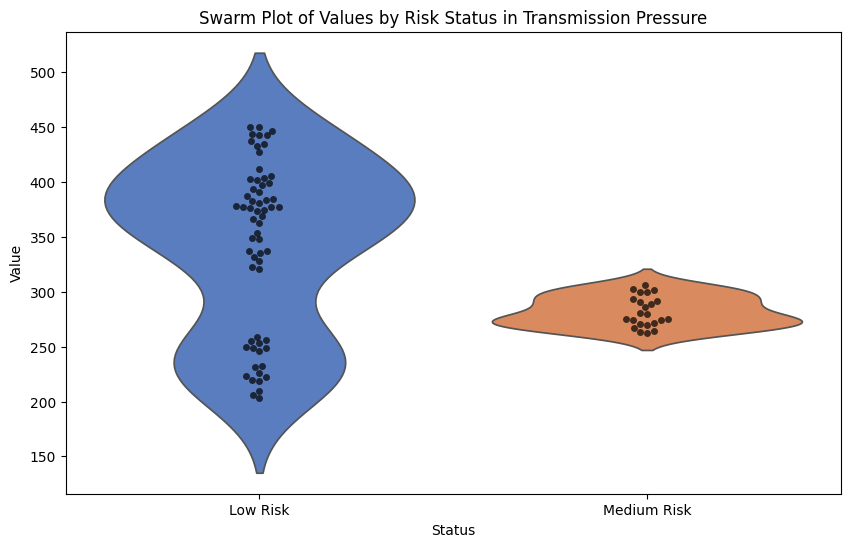

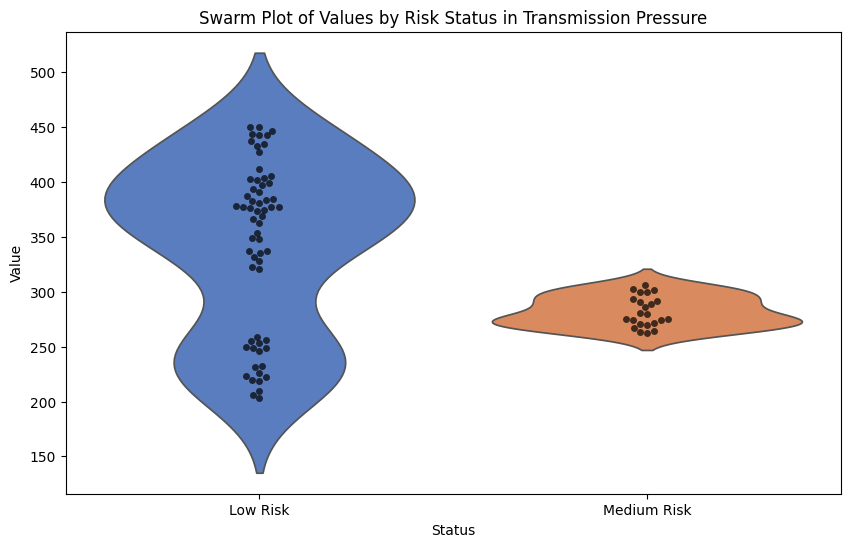

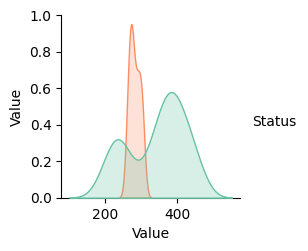

--- Analyzing Oil Pressure ---
           Value
count  90.000000
mean   46.533333
std    11.906188
min    25.000000
25%    37.250000
50%    46.000000
75%    57.750000
max    72.000000
Risk Status Counts:
Status
Low Risk    90
Name: count, dtype: int64



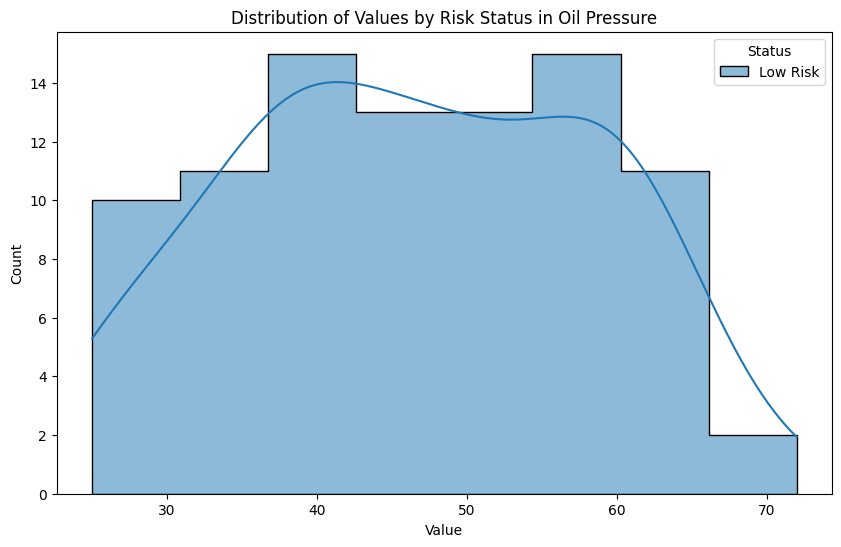

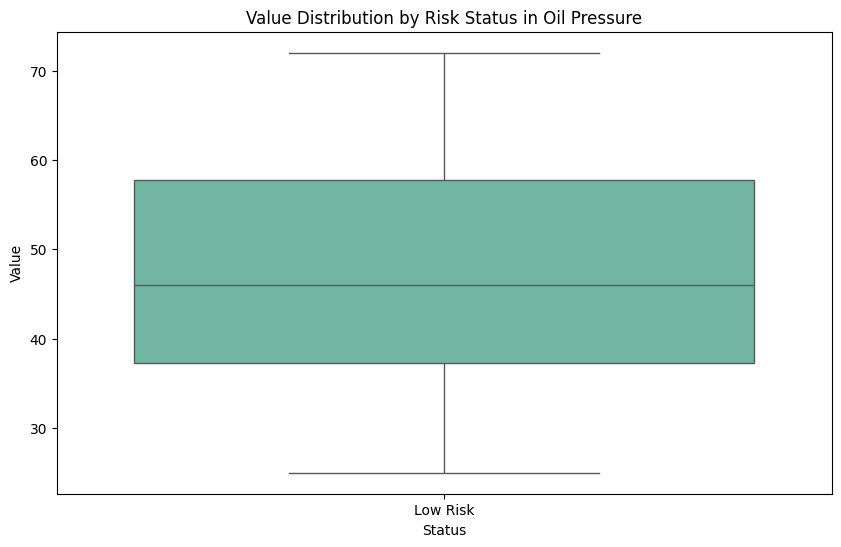

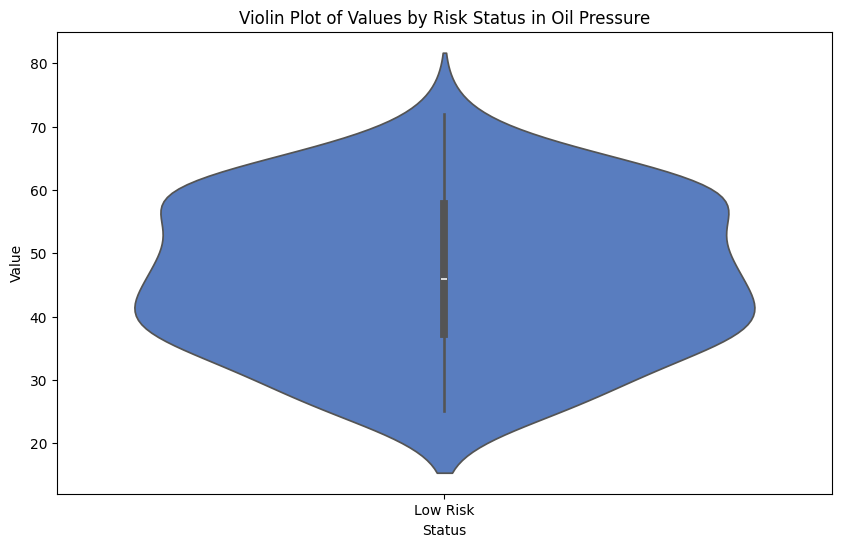

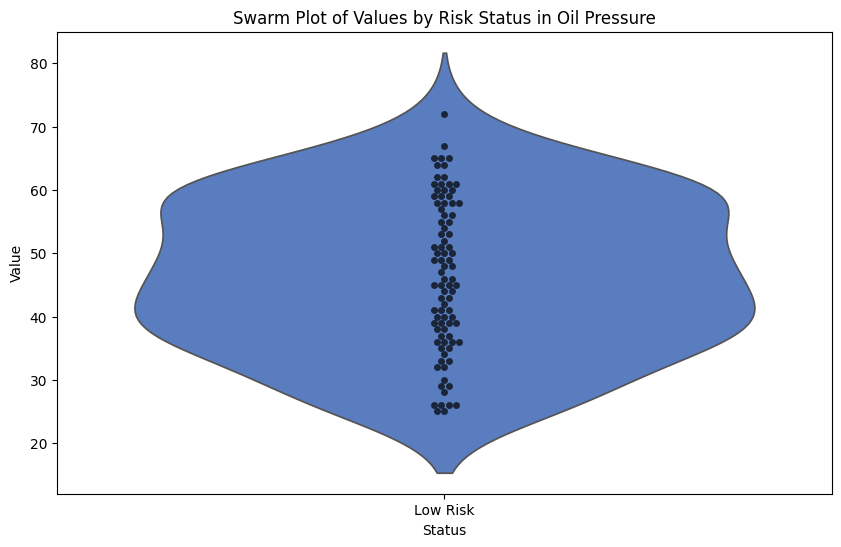

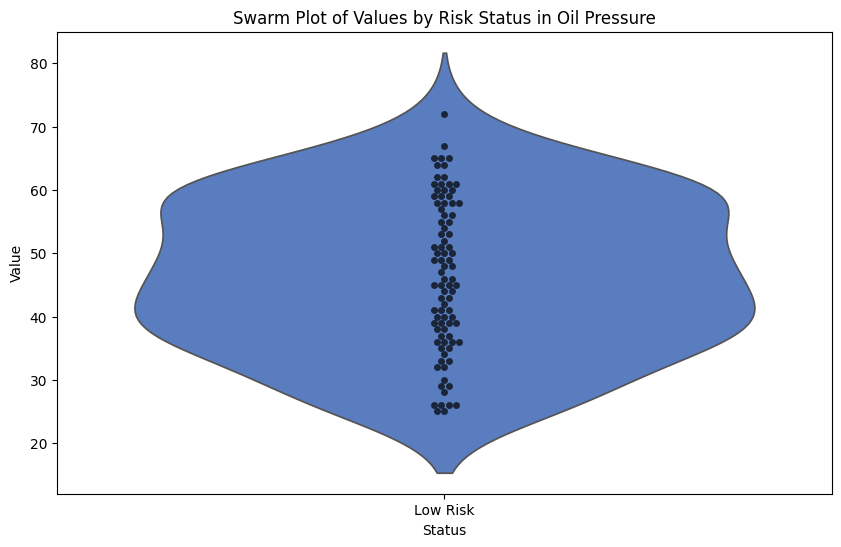

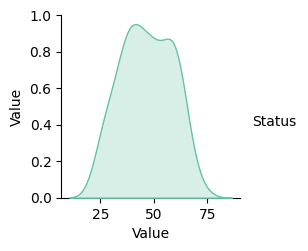

--- Analyzing Brake Control ---
           Value
count  85.000000
mean    5.764706
std     2.697649
min     1.000000
25%     4.000000
50%     5.000000
75%     8.000000
max    10.000000
Risk Status Counts:
Status
High Risk    82
Low Risk      3
Name: count, dtype: int64



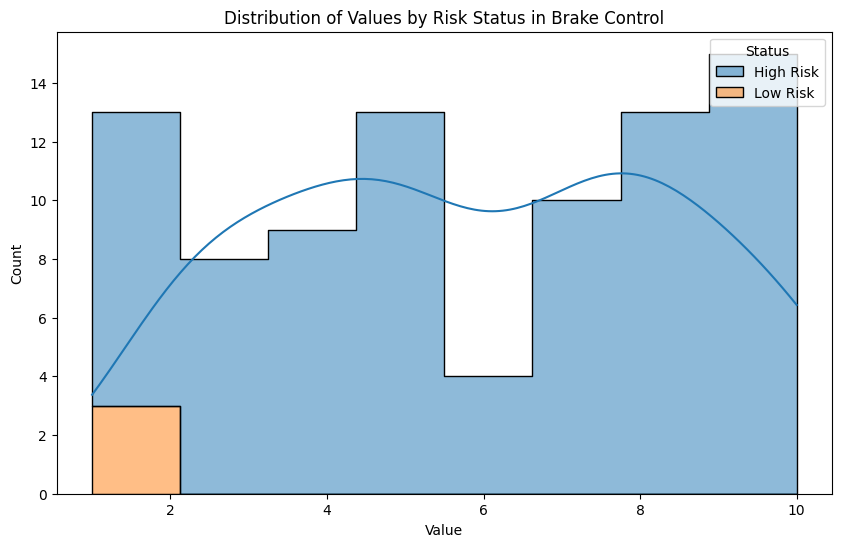

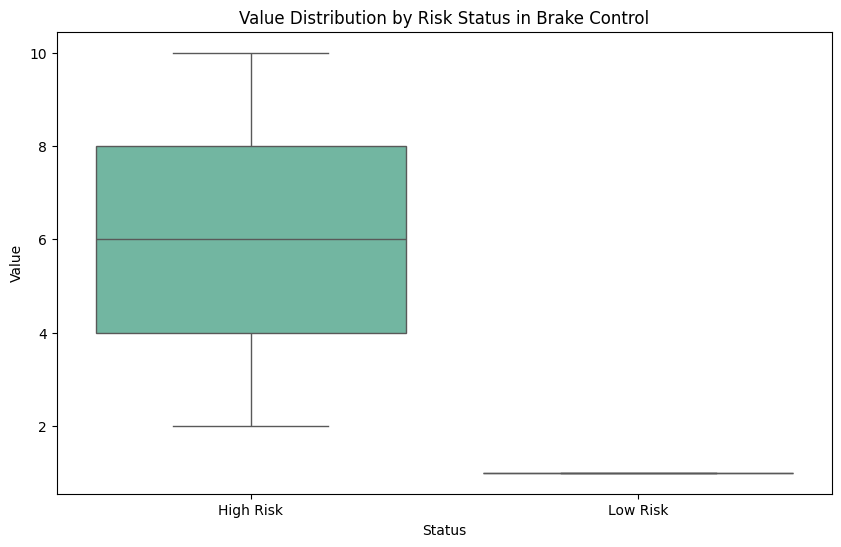

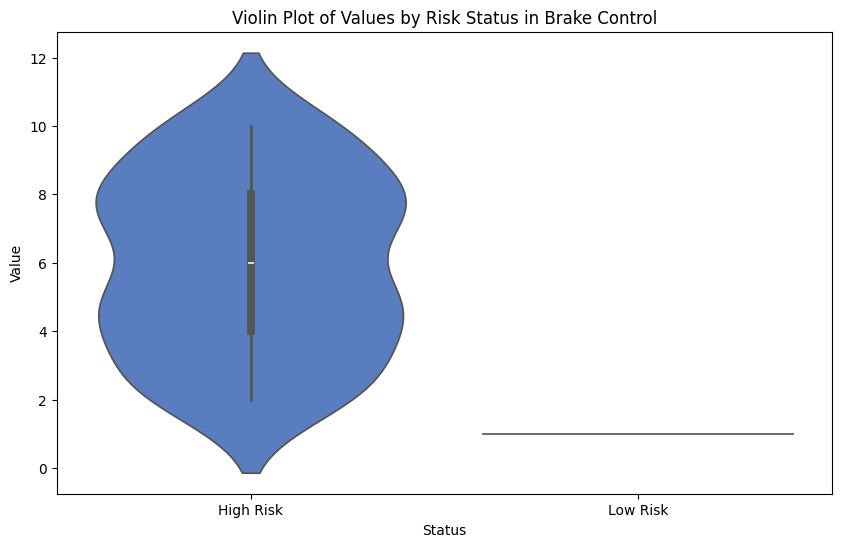

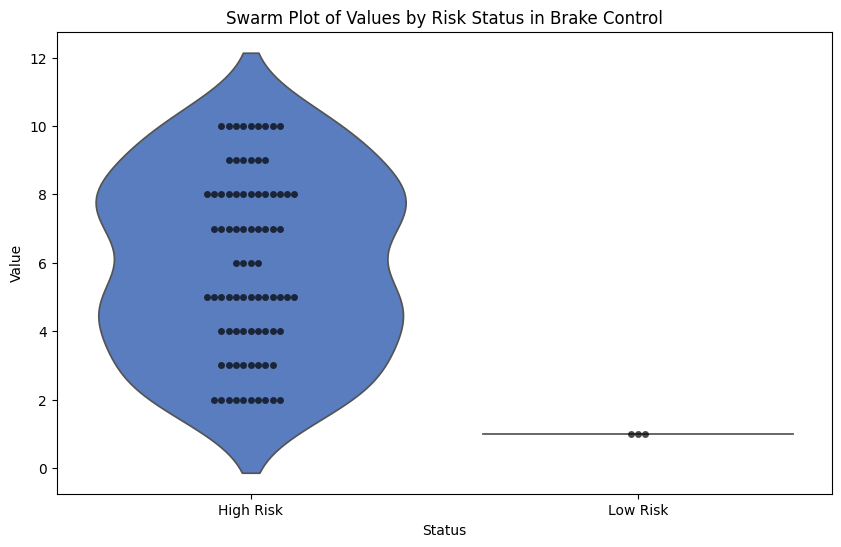

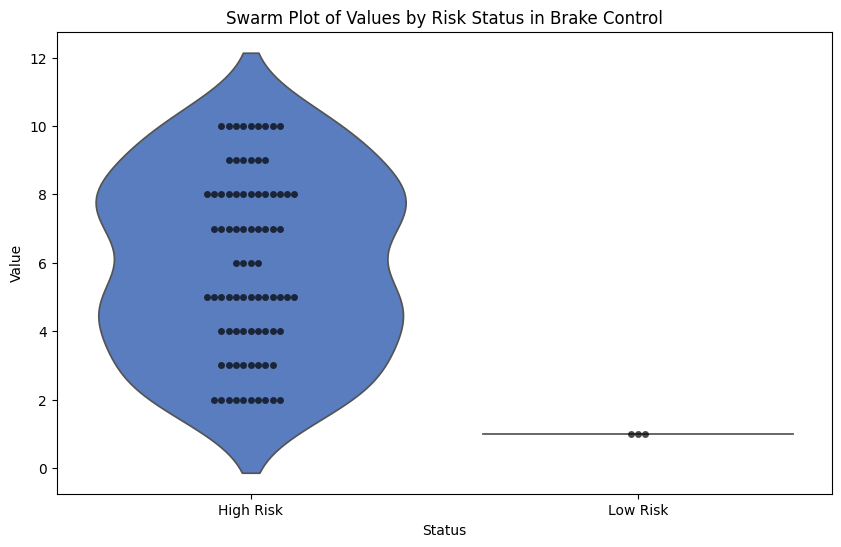

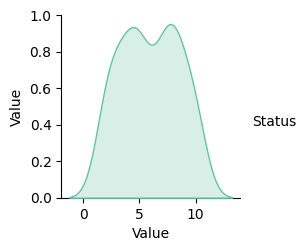

--- Analyzing Pedal sensor ---
           Value
count  80.000000
mean    4.092522
std     0.573936
min     3.038219
25%     3.684439
50%     4.150377
75%     4.583308
max     4.988577
Risk Status Counts:
Status
Low Risk       70
Medium Risk    10
Name: count, dtype: int64



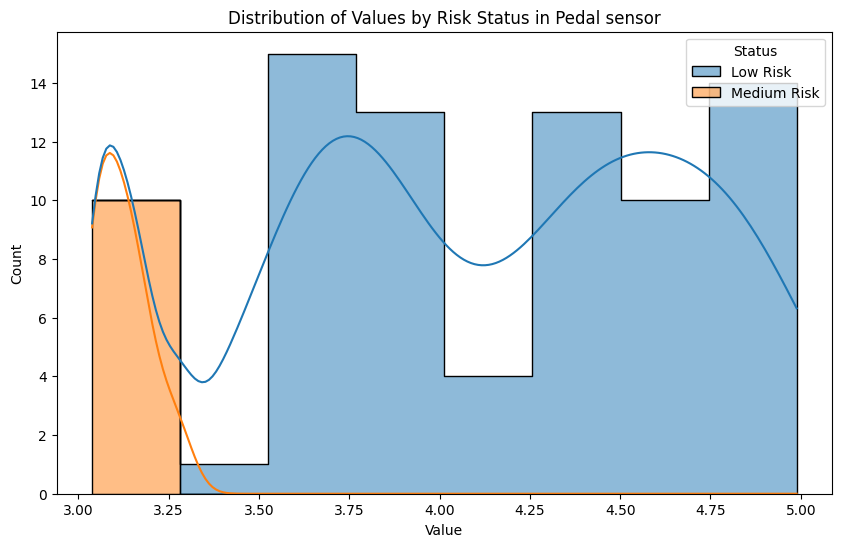

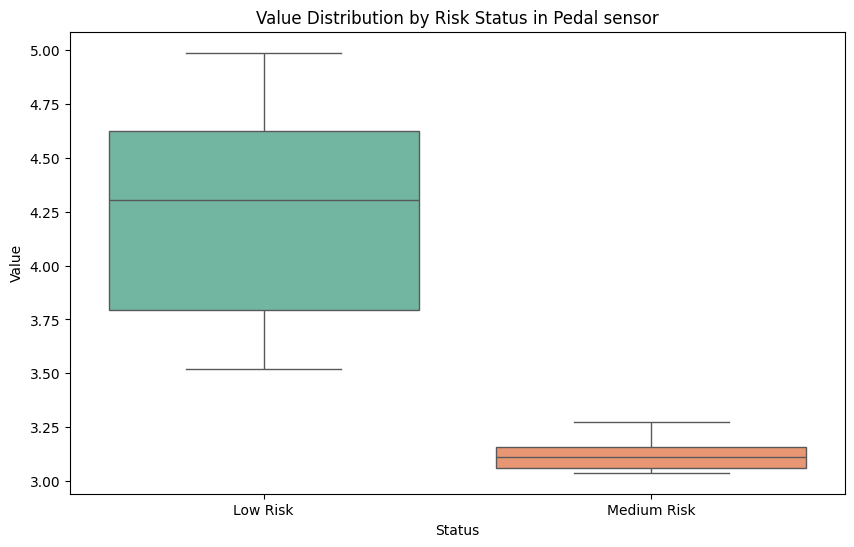

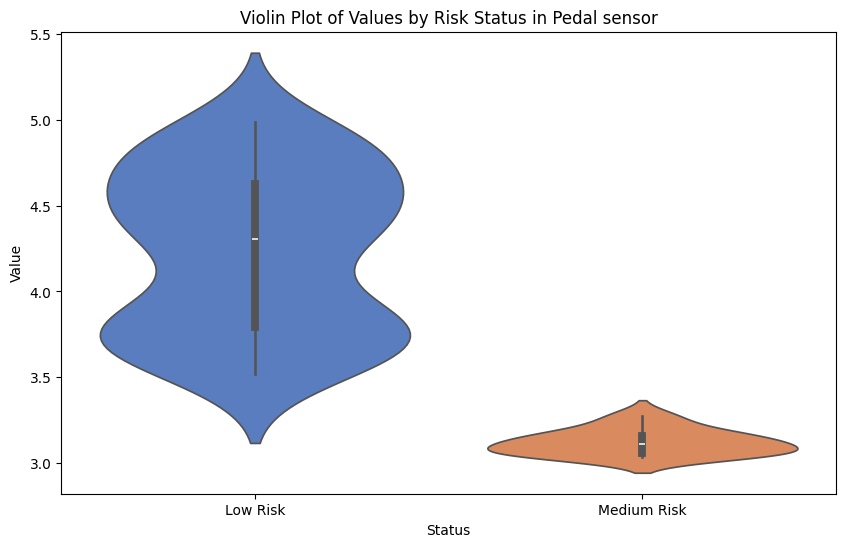

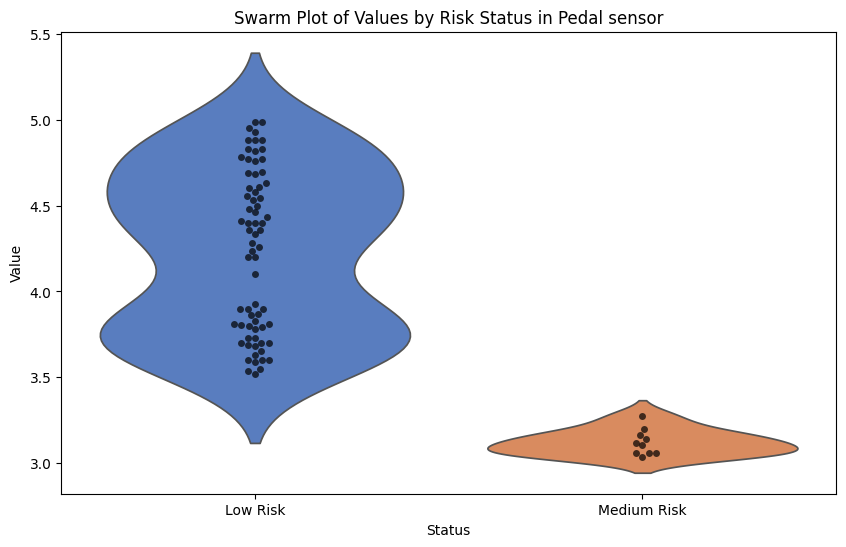

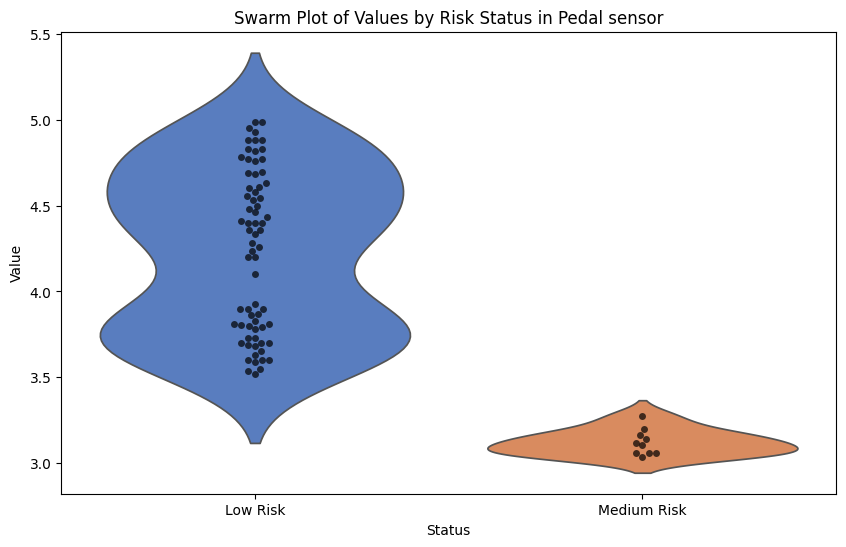

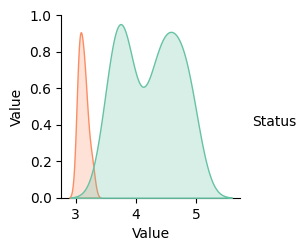

--- Analyzing Exhaust Gas Temperature ---
            Value
count   65.000000
mean   264.492308
std     60.933653
min    176.000000
25%    210.000000
50%    262.000000
75%    312.000000
max    368.000000
Risk Status Counts:
Status
Low Risk    65
Name: count, dtype: int64



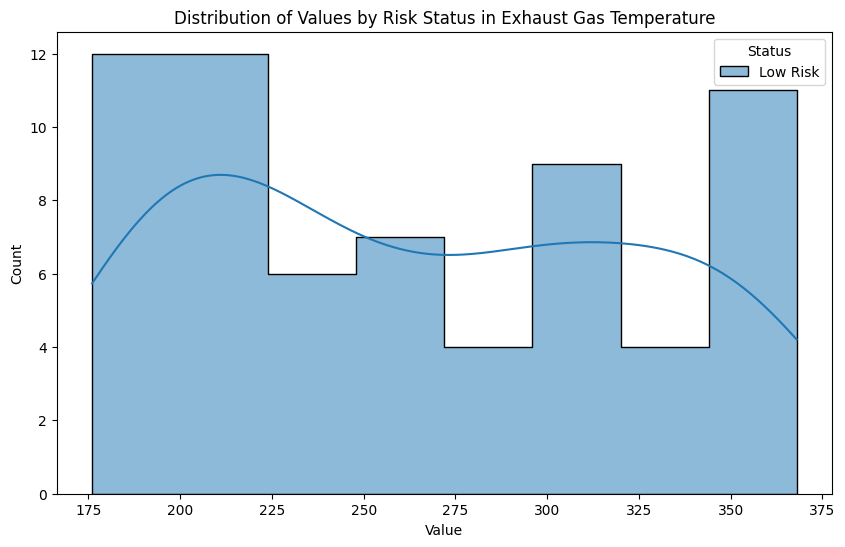

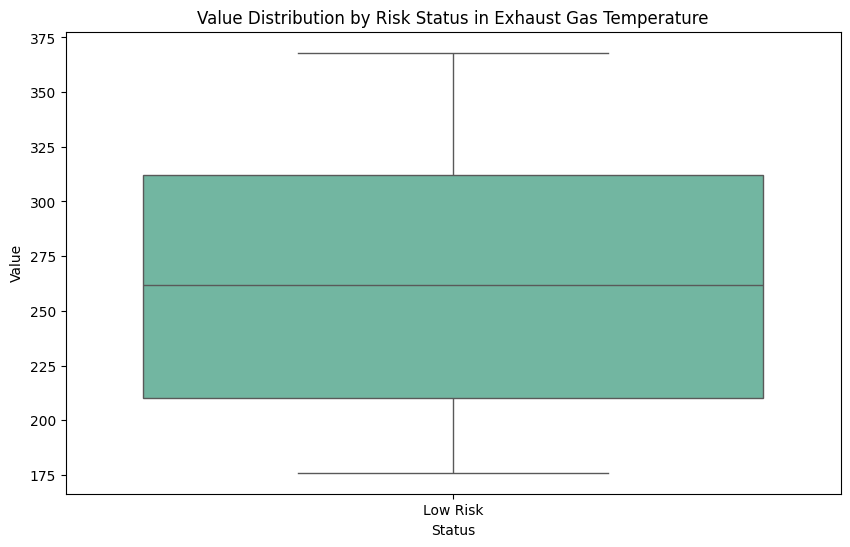

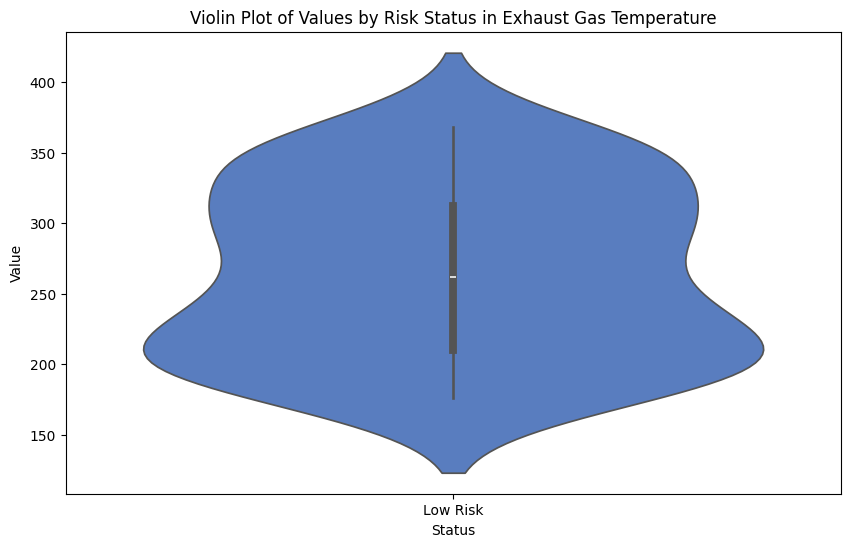

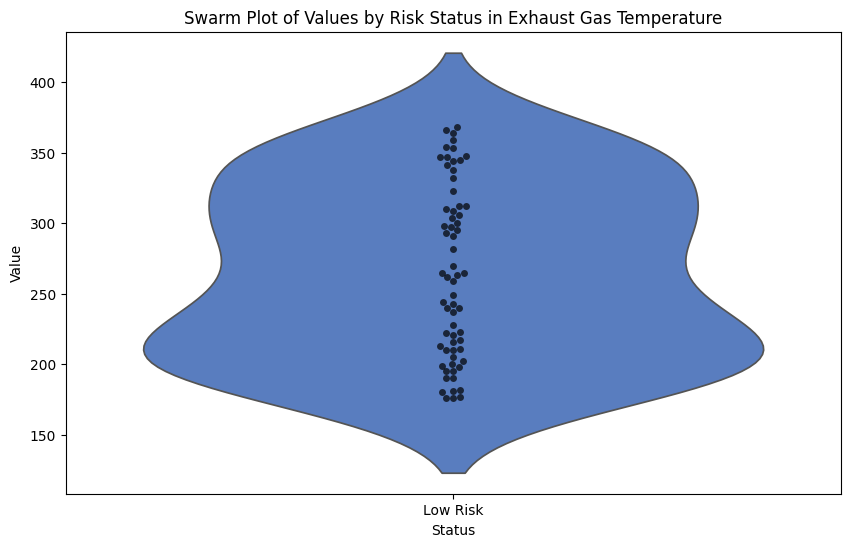

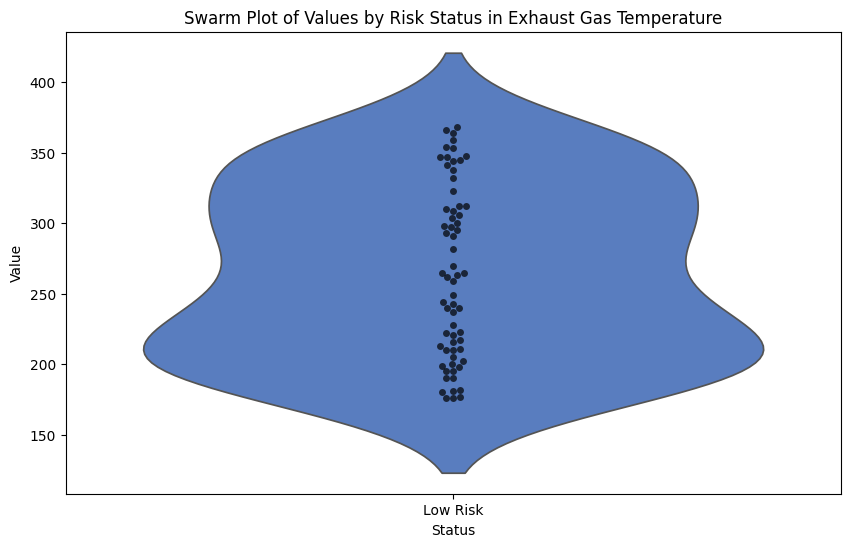

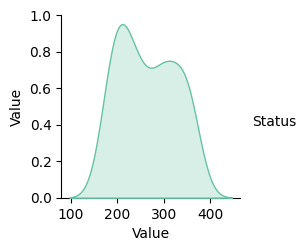

--- Analyzing Air Filter Pressure ---
           Value
count  60.000000
mean   27.350000
std     4.668049
min    20.000000
25%    23.000000
50%    27.000000
75%    31.000000
max    36.000000
Risk Status Counts:
Status
Low Risk       29
Medium Risk    22
High Risk       9
Name: count, dtype: int64



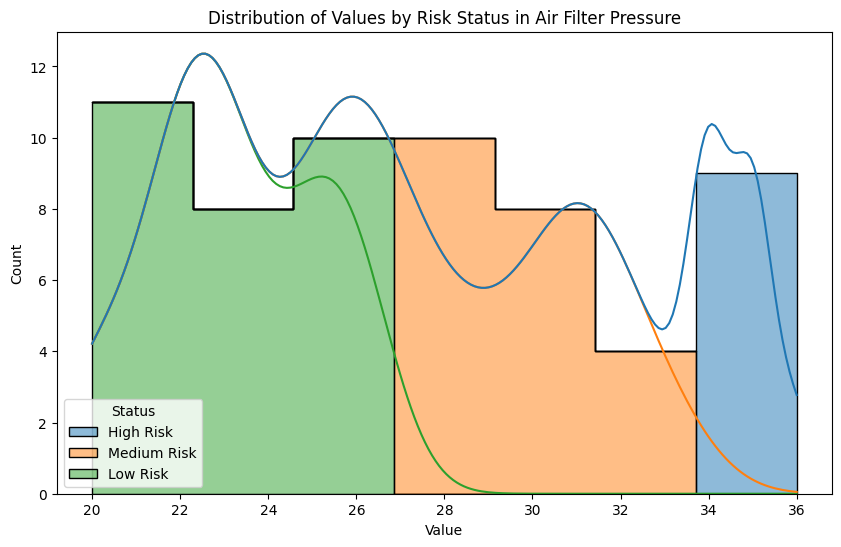

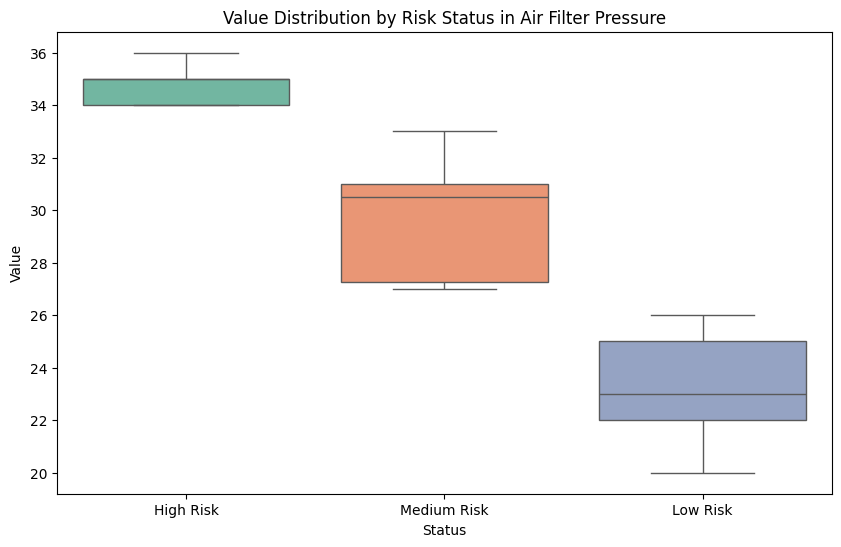

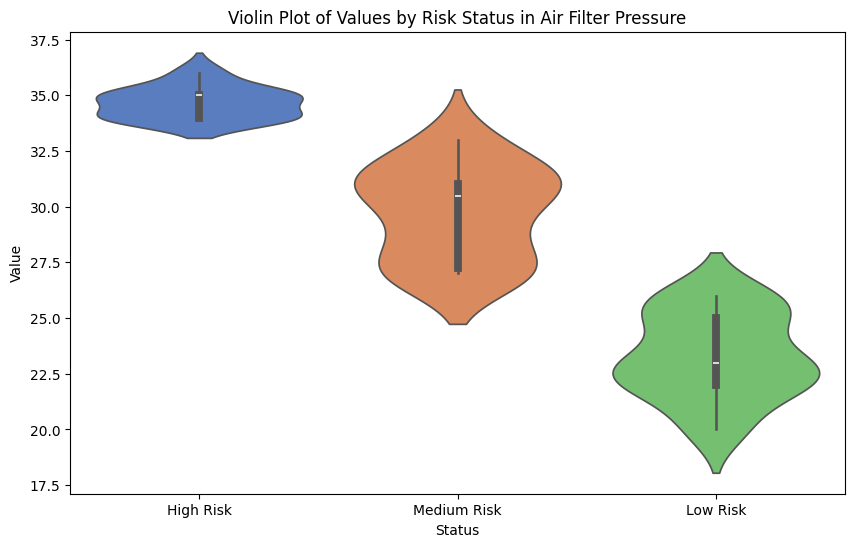

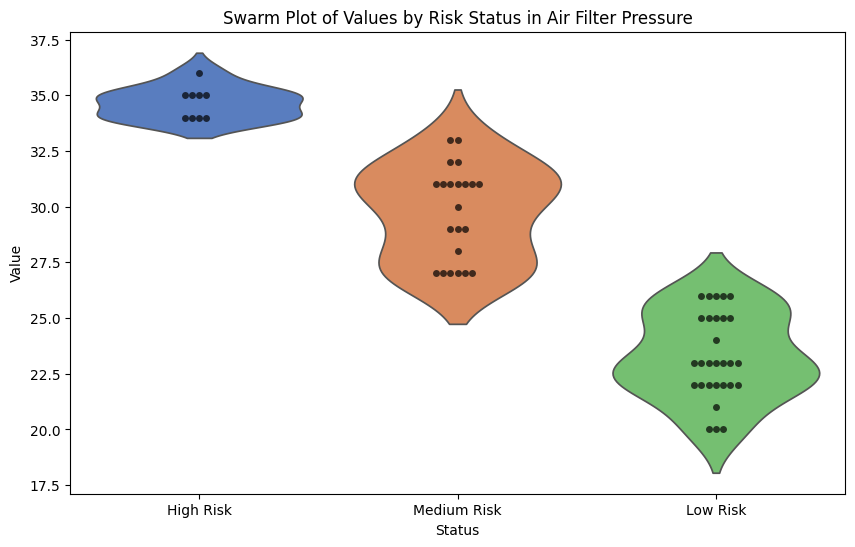

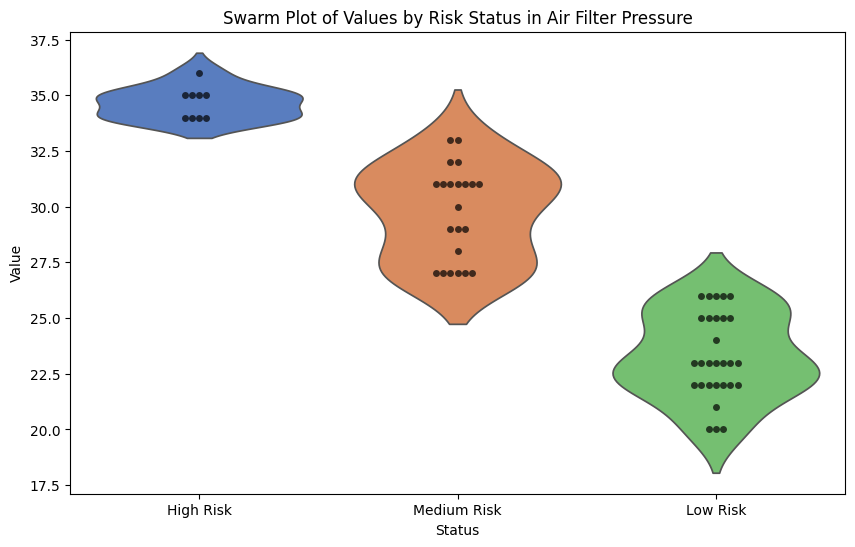

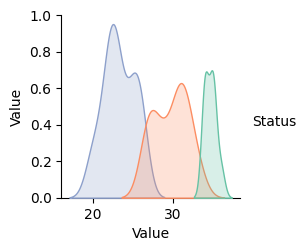

--- Analyzing System Voltage ---
           Value
count  65.000000
mean   14.057637
std     1.030955
min    12.016341
25%    13.220000
50%    14.286195
75%    14.954554
max    15.840000
Risk Status Counts:
Status
Low Risk    65
Name: count, dtype: int64



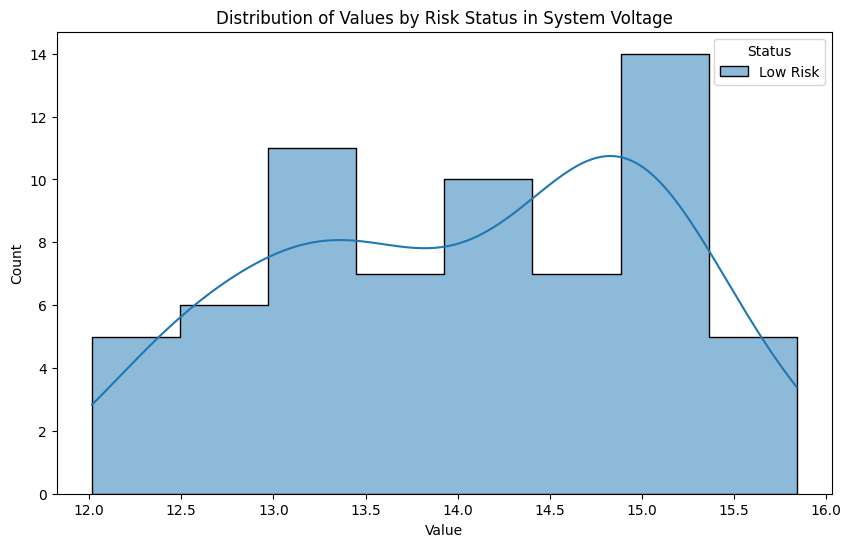

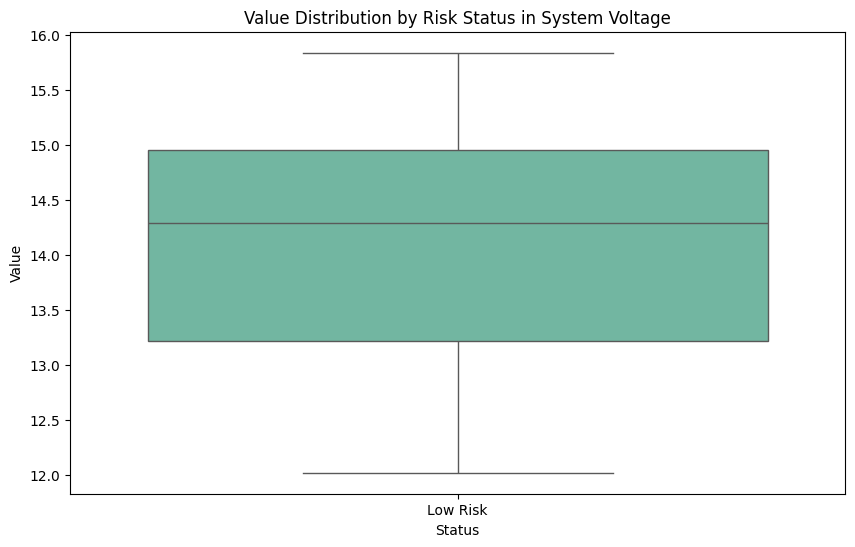

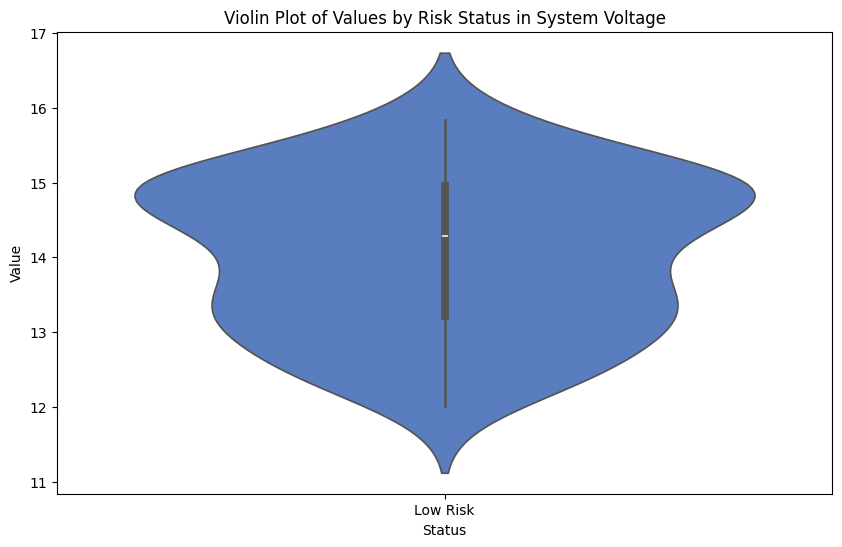

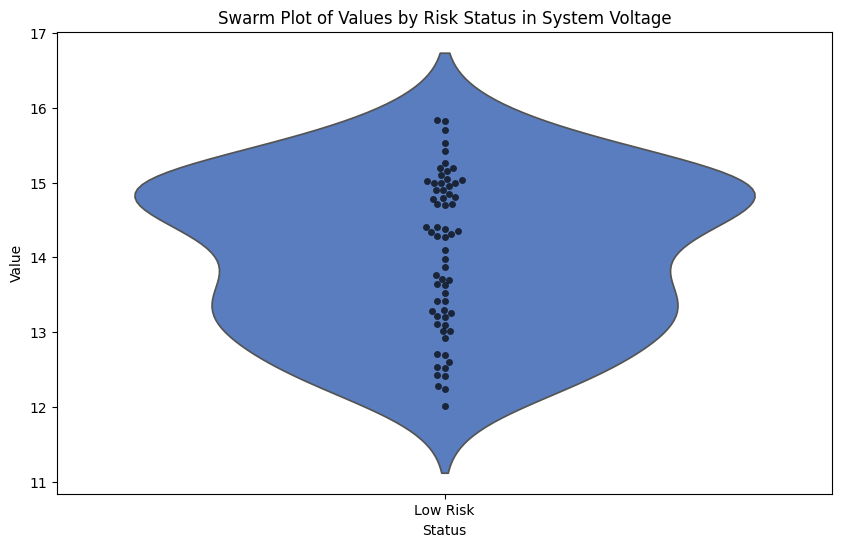

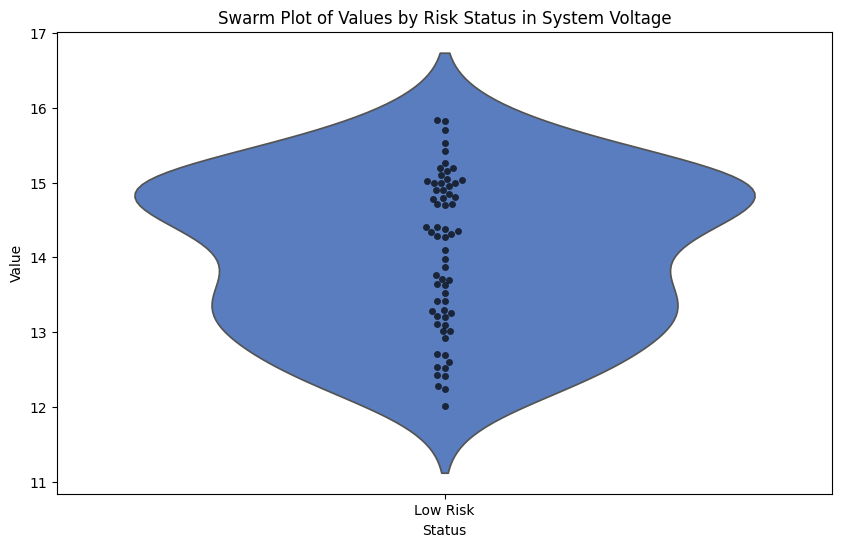

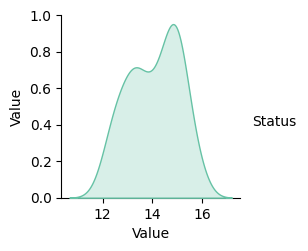

--- Analyzing Hydraulic Pump Rate ---
            Value
count   60.000000
mean   103.050000
std     15.874962
min     76.000000
25%     88.000000
50%    107.000000
75%    117.250000
max    125.000000
Risk Status Counts:
Status
Low Risk       46
Medium Risk    14
Name: count, dtype: int64



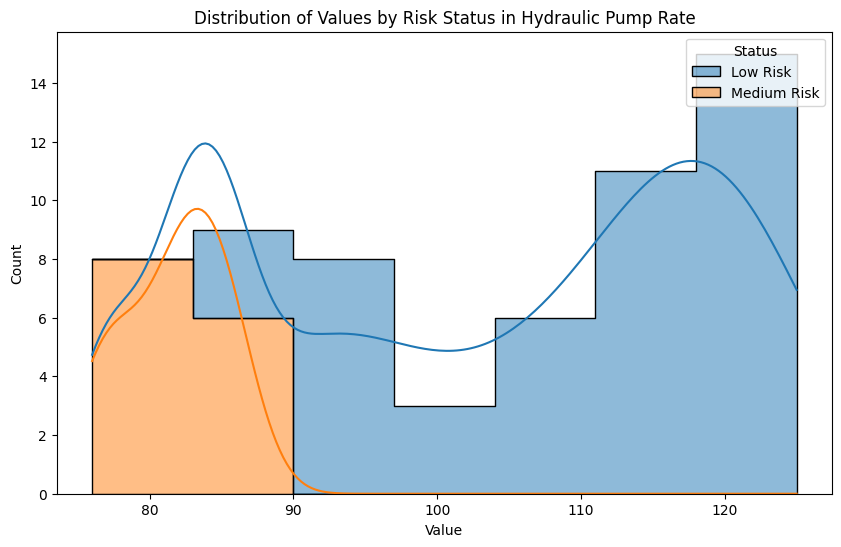

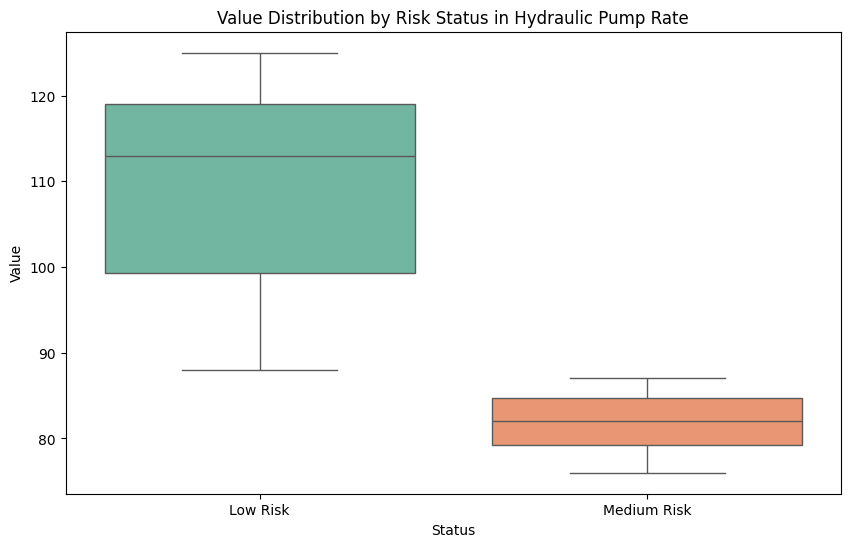

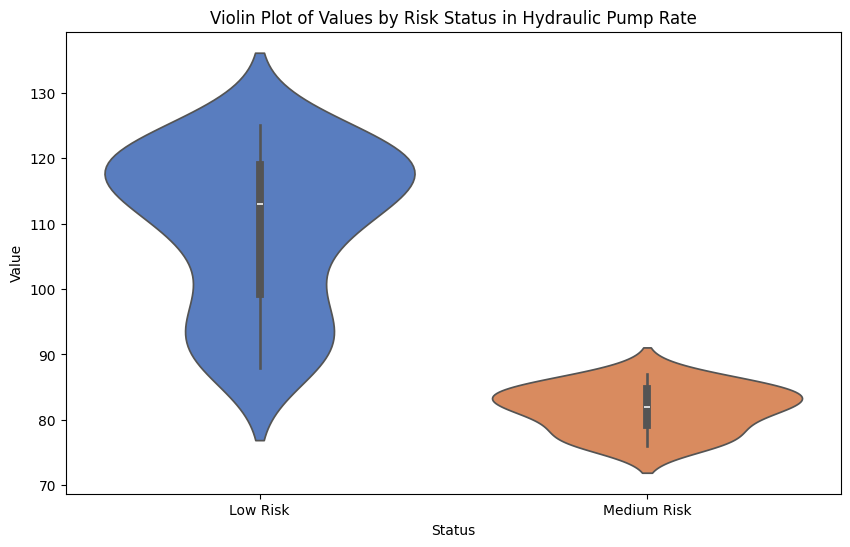

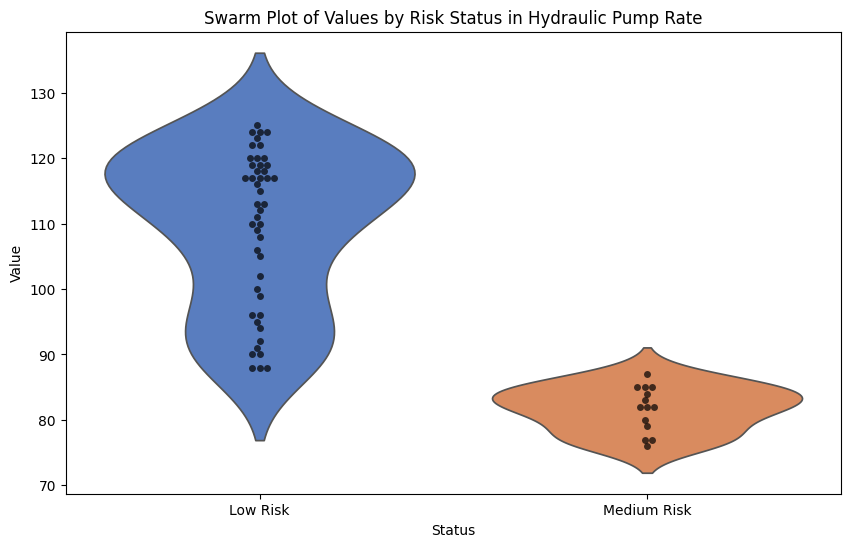

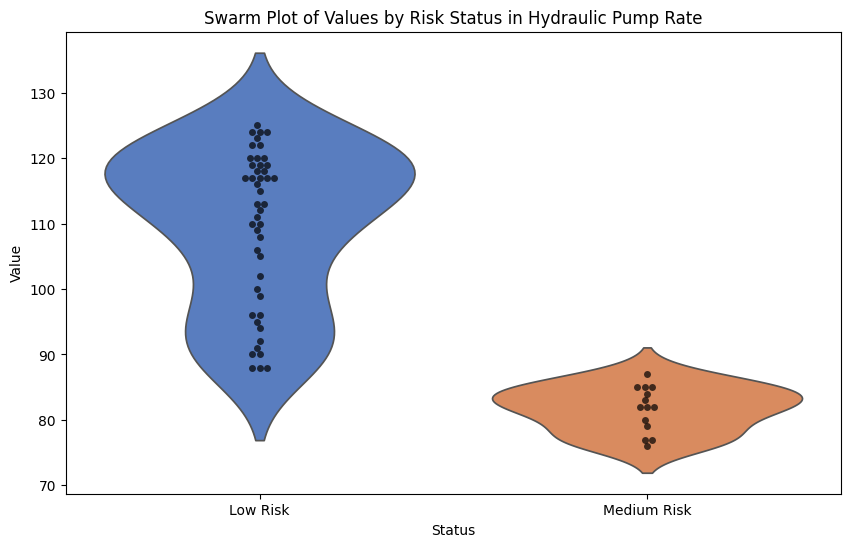

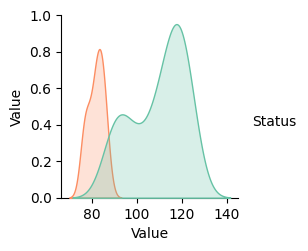

--- Analyzing Engine Speed ---
             Value
count    90.000000
mean   1543.455556
std     144.393747
min    1250.000000
25%    1425.250000
50%    1539.500000
75%    1663.250000
max    1870.000000
Risk Status Counts:
Status
Low Risk       89
Medium Risk     1
Name: count, dtype: int64



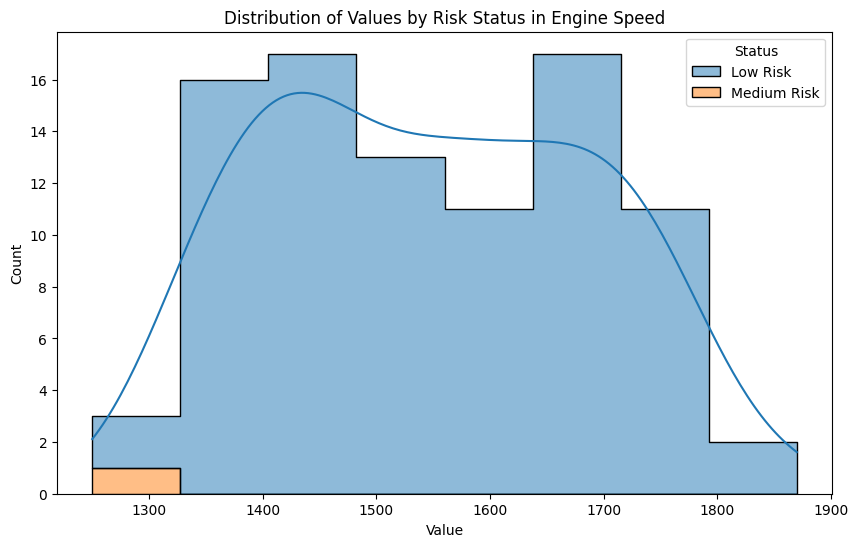

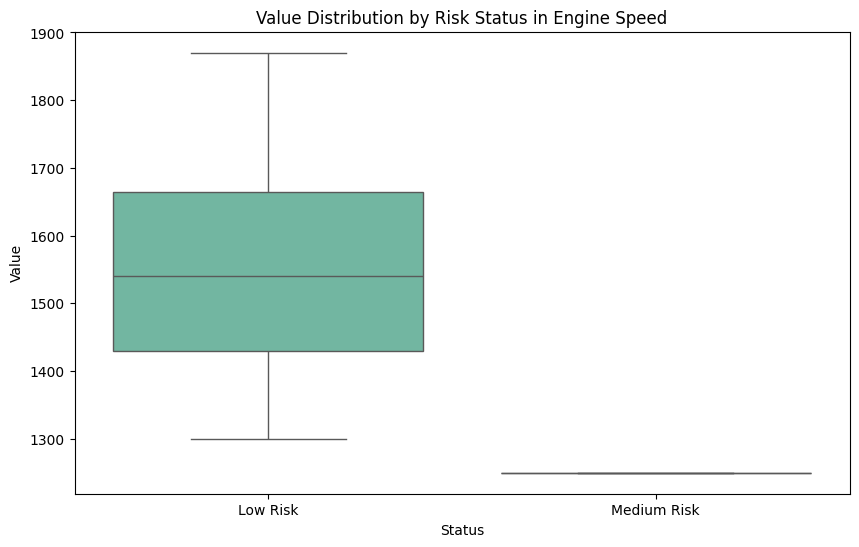

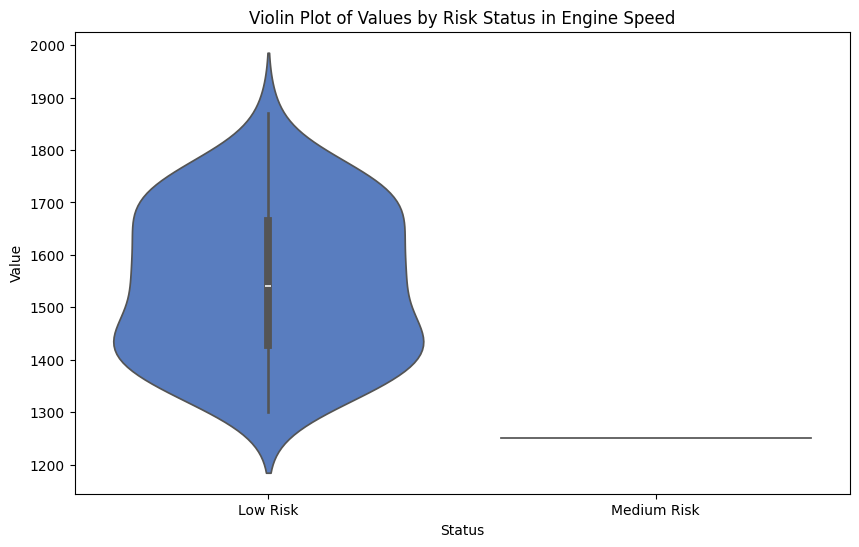

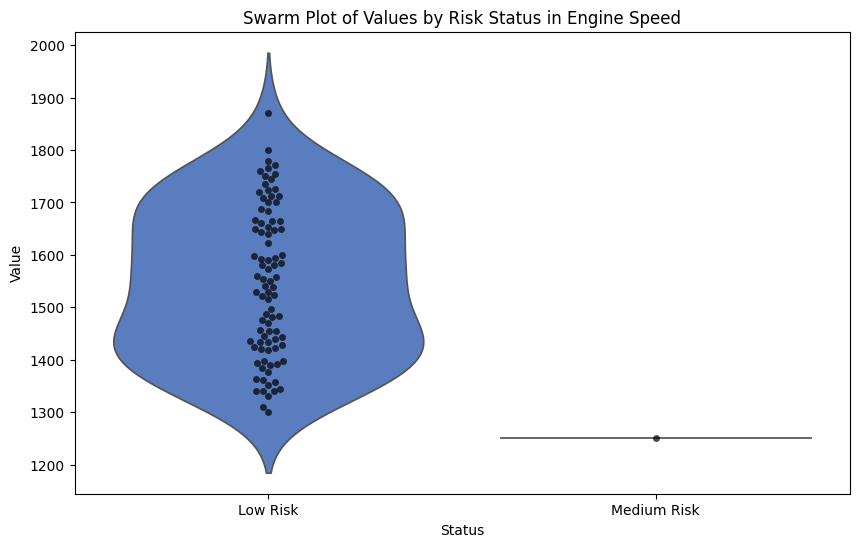

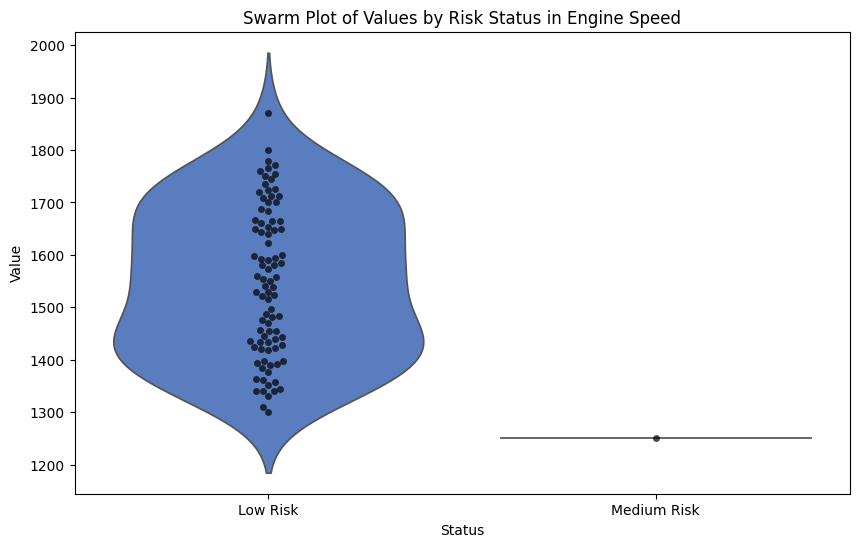

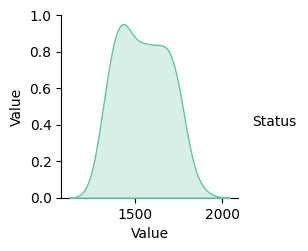

--- Analyzing Level ---
           Value
count  70.000000
mean    5.485714
std     2.459780
min     1.000000
25%     3.250000
50%     6.000000
75%     7.000000
max    10.000000
Risk Status Counts:
Status
High Risk    68
Low Risk      2
Name: count, dtype: int64



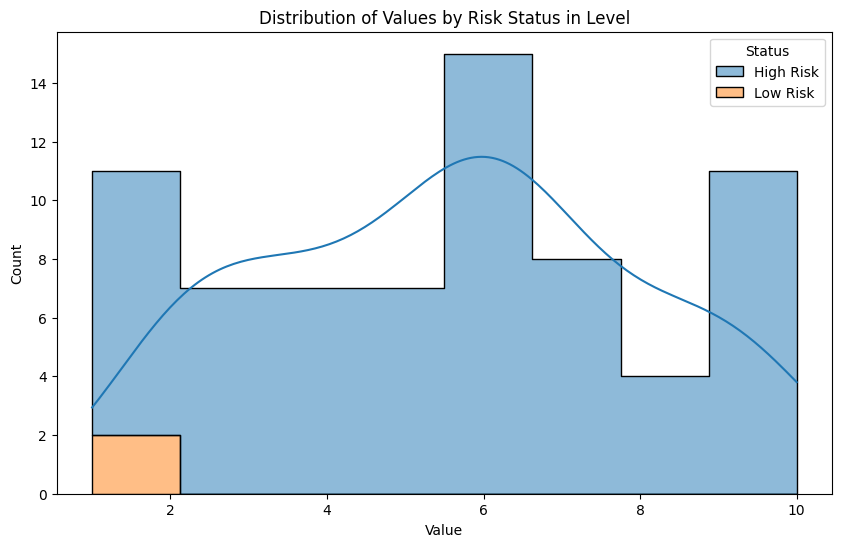

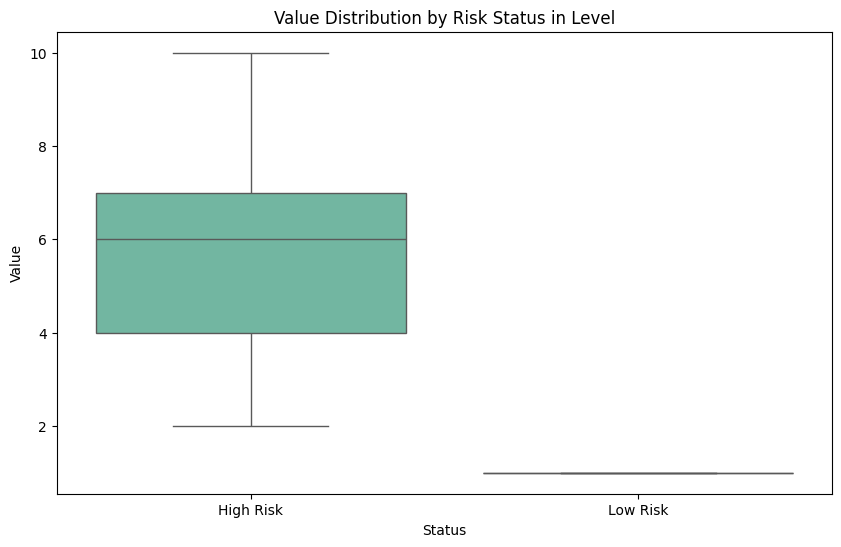

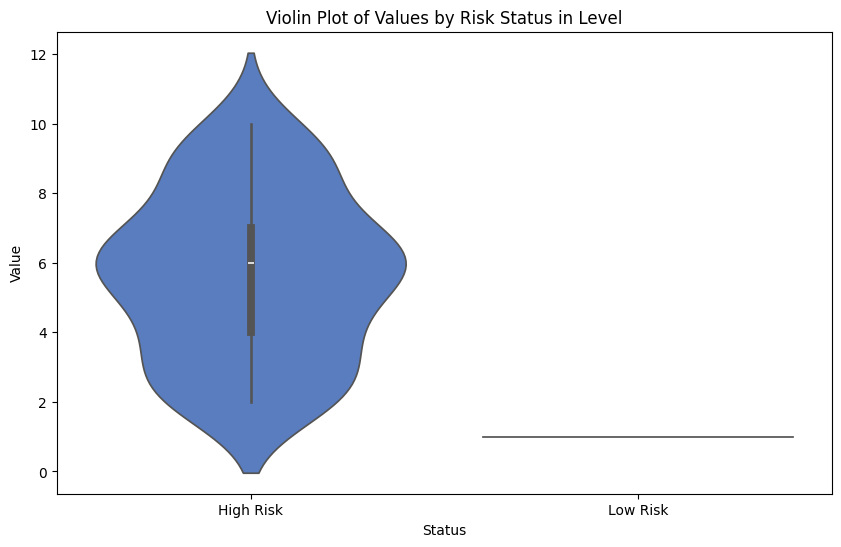

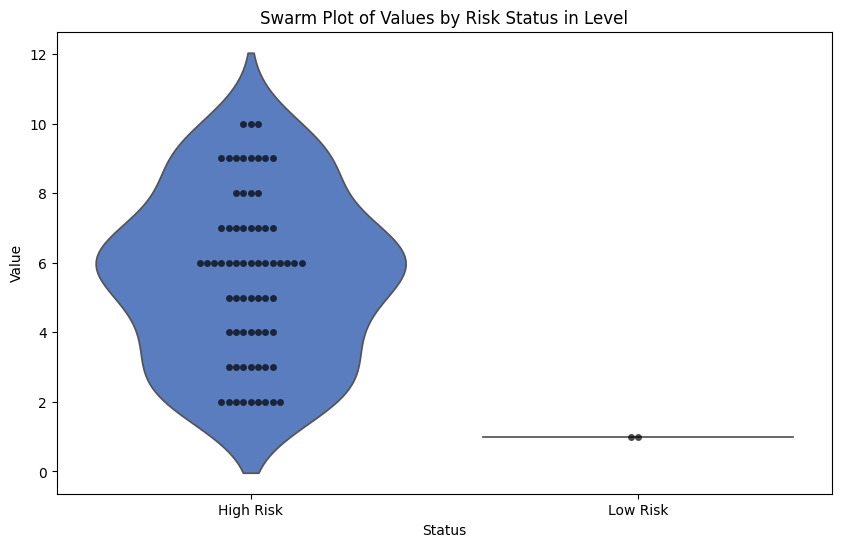

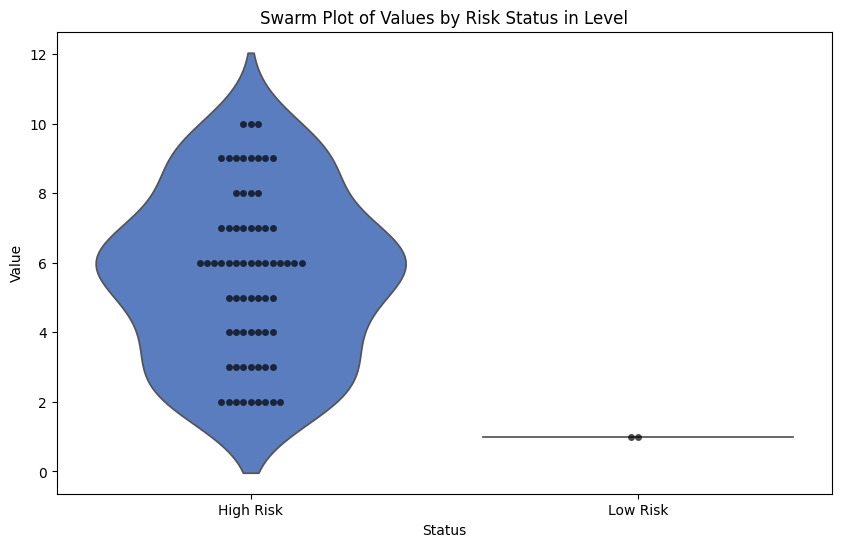

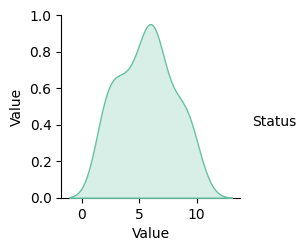

--- Analyzing Pressure ---
           Value
count  55.000000
mean   50.400000
std     9.395823
min    35.000000
25%    44.000000
50%    49.000000
75%    57.500000
max    72.000000
Risk Status Counts:
Status
Low Risk    55
Name: count, dtype: int64



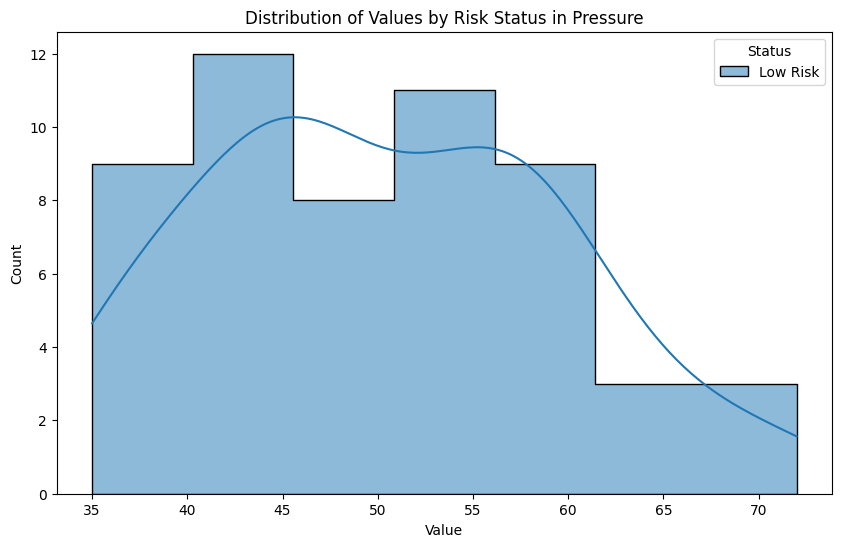

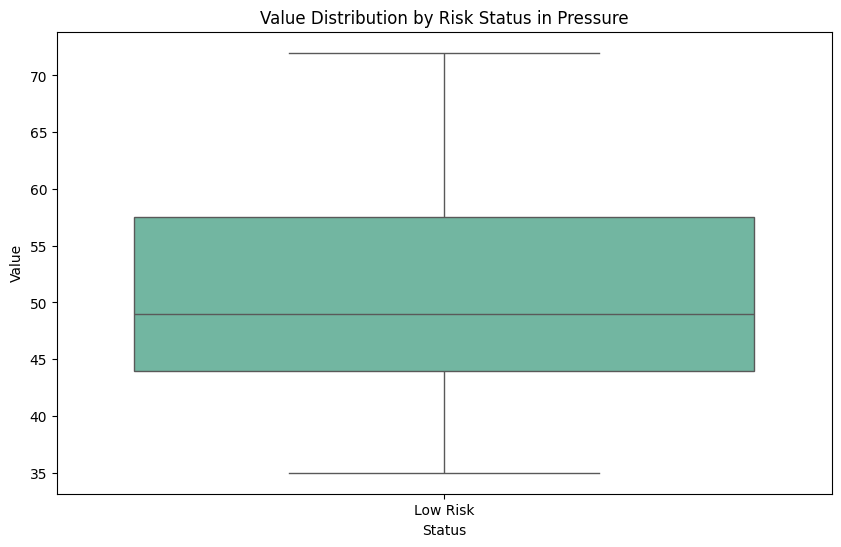

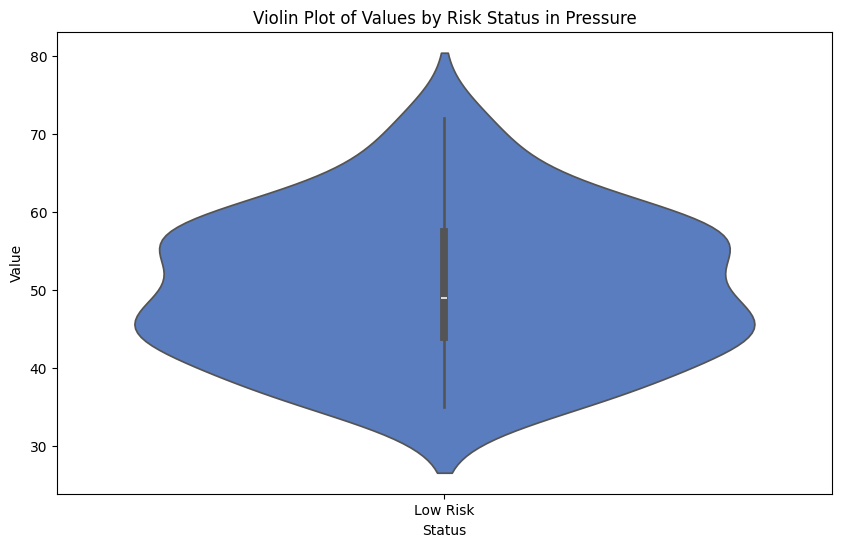

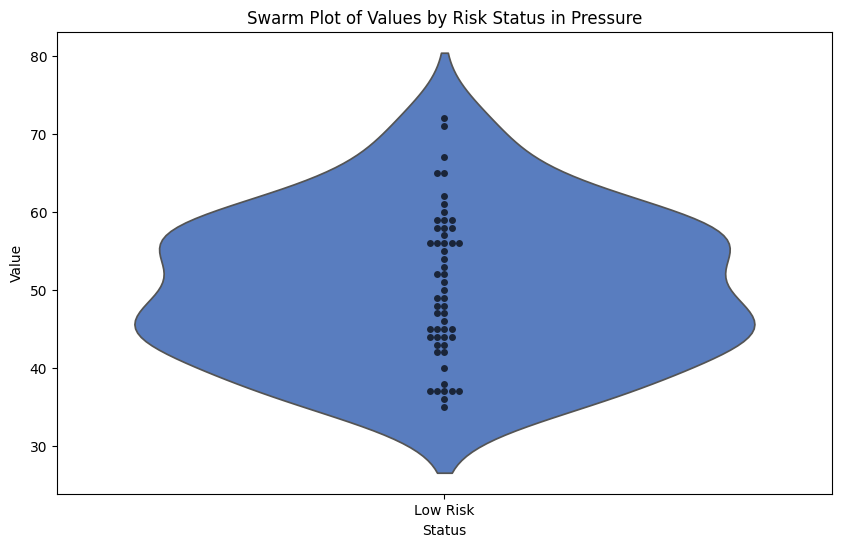

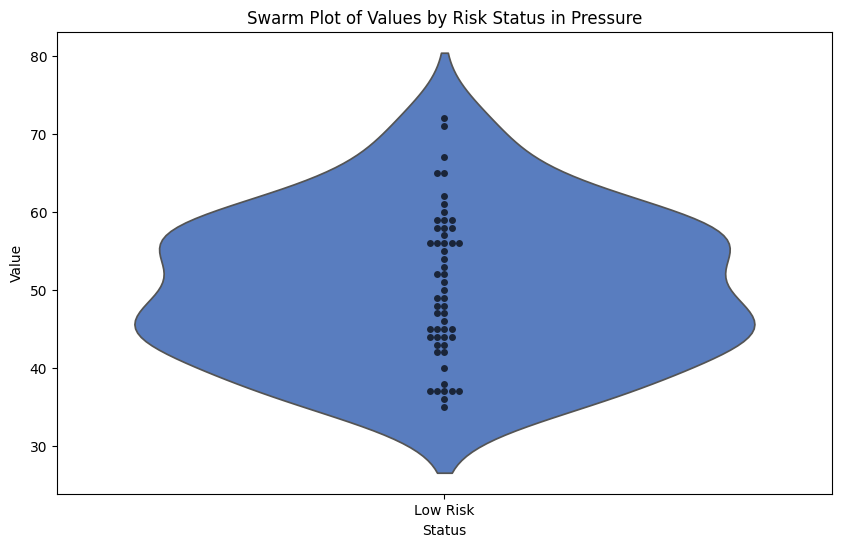

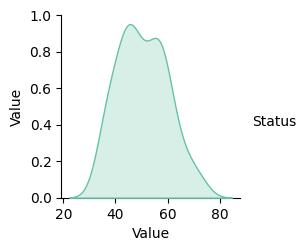

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to analyze each dataset

def analyze_dataset(df, dataset_name):
    # Summary statistics
    print(f"--- Analyzing {dataset_name} ---")
    print(df.describe())
    
    # Count of each risk status
    risk_counts = df['Status'].value_counts()
    print(f"Risk Status Counts:\n{risk_counts}\n")
    
    # Distribution of values by risk status
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Value', hue='Status', element='step', multiple='stack', kde=True)
    plt.title(f'Distribution of Values by Risk Status in {dataset_name}')
    plt.savefig(f'../graphs/{dataset_name}_value_distribution.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Status', y='Value', palette='Set2')
    plt.title(f'Value Distribution by Risk Status in {dataset_name}')
    plt.savefig(f'../graphs/{dataset_name}_boxplot_risk.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Status', y='Value', palette='muted')
    plt.title(f'Violin Plot of Values by Risk Status in {dataset_name}')
    plt.savefig(f'../graphs/{dataset_name}_violinplot_risk.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Status', y='Value', palette='muted', inner=None)
    sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.7)
    plt.title(f'Swarm Plot of Values by Risk Status in {dataset_name}')
    plt.savefig(f'../graphs/{dataset_name}_swarmplot_risk.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Status', y='Value', palette='muted', inner=None)
    sns.swarmplot(data=df, x='Status', y='Value', color='k', alpha=0.7)
    plt.title(f'Swarm Plot of Values by Risk Status in {dataset_name}')
    plt.savefig(f'../graphs/{dataset_name}_swarmplot_risk.png')
    plt.show()

    sns.pairplot(df, hue='Status', palette='Set2')
    plt.savefig(f'../graphs/{dataset_name}_pairplot.png')
    plt.show()
    
    # Check for 'Parameter' column before using it
    if 'Parameter' in df.columns:
        pivot_df = df.pivot(index="Parameter", columns="Status", values="Value")
        sns.clustermap(pivot_df, cmap="coolwarm", standard_scale=1)
        plt.savefig(f'../graphs/{dataset_name}_clustermap.png')
        plt.show()
# List of datasets and their corresponding names
datasets = [
    ('Temperature', temperature_df), 
    ('Water in Fuel', water_in_fuel_df), 
    ('Transmission Pressure', transmission_pressure_df), 
    ('Oil Pressure', oil_pressure_df), 
    ('Brake Control', brake_control_df), 
    ('Pedal sensor', pedal_sensor_df), 
    ('Exhaust Gas Temperature', exhaust_temperature_df), 
    ('Air Filter Pressure', air_filter_pressure_df), 
    ('System Voltage', system_voltage_df), 
    ('Hydraulic Pump Rate', hydraulic_pump_rate_df), 
    ('Engine Speed', engine_speed_df), 
    ('Level', level_df), 
    ('Pressure', pressure_df)
]

# Loop through each dataset and analyze it
for dataset_name, df in datasets:
    analyze_dataset(df, dataset_name)